<a href="https://colab.research.google.com/github/Suryans01/Appliance-Energy-Prediction-Regression/blob/main/Appliance_Energy_Prediction_Regression(Capstone_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - **Linear Regression**
##### **Contribution**    - Team
##### **Team Member 1 -** **Mohit Nath** (m.mohitmonu09@gmail.com)
##### **Team Member 2 -** **Suryansh Singh**(suryanx14@gmail.com)

# **Project Summary -**
The main focus of the capstone project is to conduct an analysis on the data related to the energy consumption of household appliances. Specifically, the data pertains to the energy used by these appliances in watts per hour, and was collected every 10 minutes between the months of January and May. The goal of the project is to utilize this data to develop a machine learning model that can accurately predict appliance energy consumption based on various household parameters.

The capstone project involves the utilization of a dataset that consists of 29 columns, one of which is the dependent variable, called "Appliances," and the remaining 28 columns are independent variables. The dataset contains various parameters related to a building, such as temperature values of different rooms (T1 to T9) and outdoor temperature (Tout), expressed in Celsius. It also includes humidity values of different rooms (RH1 to RH9) and outdoor humidity (RHout), expressed as a percentage. Additionally, the dataset includes other columns such as pressure, wind speed, visibility, and dew point temperature, measured in units of millimeters of mercury (mm Hg), meters per second (m/s), kilometers (Km), and degrees Celsius (°C), respectively. The majority of the column values in the dataset are of the floating-point data type. The goal of the project is to develop a machine learning model that can predict appliance energy consumption based on these parameters.

The data was collected through home sensors at regular intervals of 10 minutes over a period of 4.5 months.
The project involved several data preprocessing steps, including loading the dataset and extracting information such as column types, null values, and unique values. Graphs were plotted to analyze the data, and outliers were detected using box plots and removed. Correlation plots were also used to gain additional insights. Feature engineering was performed by creating a new variable, High Consumption and Low Consumption, based on hourly mean energy usage. The mean energy per hour function was developed to segregate Appliance values into High and Low consumption categories based on the hour average of Appliance usage as a reference. Overall, exploratory data analysis (EDA) was conducted to draw conclusions and insights from the data.

After cleaning and preparing the dataset, we used supervised machine learning models with a regression approach to predict appliance energy consumption. To remove collinearity between columns and improve the dataset for modeling, we calculated the Variation Inflation Factor (VIF) scores of all columns and removed those with a VIF score greater than 10. We trained and evaluated several models including Linear Regression, Lasso Regression, Ridge Regression, Decision Trees, Random Forest, XGBoost, and Extra Trees Regression. Random Forest and Extra Trees Regression are ensembles of decision trees. We assessed the models based on their R2 scores, which indicate how well the models fit the data.

## **GitHub Link :** -  


https://github.com/Suryans01/Appliance-Energy-Prediction-Regression-Project/blob/main/README.md

# **Problem Statement**

This data set contains information on the energy usage of appliances in a house, collected over a period of approximately 4.5 months at 10 minute intervals. The temperature and humidity of the house were monitored using a wireless sensor network, with each node transmitting data every 3.3 minutes. This data was then averaged over 10 minute periods. Energy usage data was also logged every 10 minutes using m-bus energy meters. In addition, weather data from the nearest airport weather station in Chievres Airport, Belgium was downloaded from a public data set and merged with the experimental data using the date and time column. Two random variables were included in the data set to test regression models and filter out non-predictive attributes. The data set includes the following columns:

date: the date in year-month-day format
time: the time in hour:minute:second format
Appliances: the energy use of appliances in the house in Watt-hours (Wh), which is the dependent variable being predicted

T1, temperature measured in the kitchen area in Celsius.

RH1, relative humidity measured in the kitchen area in %.

T2, temperature measured in the living room area in Celsius.

RH2, relative humidity measured in the living room area in %.

T3, temperature measured in the laundry room area in Celsius.

RH3, relative humidity measured in the laundry room area in %.

T4, temperature measured in the office room in Celsius.

RH4, relative humidity measured in the office room in %.

T5, temperature measured in the bathroom in Celsius.

RH5, relative humidity measured in the bathroom in %.

T6, temperature measured outside the building on the north side in Celsius.

RH6, relative humidity measured outside the building on the north side in %.

T7, temperature measured in the ironing room in Celsius.

RH7, relative humidity measured in the ironing room in %.

T8, temperature measured in teenager room 2 in Celsius.

RH8, relative humidity measured in teenager room 2 in %.

T9, temperature measured in parents' room in Celsius.

RH9, relative humidity measured in parents' room in %.

To, temperature measured outside from Chievres weather station in Celsius.

Pressure, atmospheric pressure measured from Chievres weather station in mm Hg.

RHout, relative humidity measured outside from Chievres weather station in %.

Wind speed, wind speed measured from Chievres weather station in m/s.

Visibility, visibility measured from Chievres weather station in km.

Tdewpoint, dew point temperature measured from Chievres weather station in Celsius.

rv1, random variable 1 with no unit.

rv2, random variable 2 with no unit.

##  **Importing Required Libraries**

In [ ]:

#Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import warnings
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


<ipython-input-1-b9564a098849>:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# **Mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [ ]:
file_path = '/content/drive/MyDrive/data_application_energy.csv'
df = pd.read_csv(file_path, parse_dates=['date'])


# **UNDERSTANDING THE DATA**

In [ ]:
# First View of data
df.head()



date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
df.tail()

date  Appliances  lights         T1       RH_1  \
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

### Rows & Columns count

In [ ]:
df.shape

(19735, 29)

So, In our dataset there are 19735 rows and 29 columns

### Information of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

### Let's find out number of duplicate values

In [ ]:
Duplicates=df[df.duplicated()]
Duplicates


Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]

So, there are zero duplicate values.

# **DATA CLEANING**

## Let's check Missing or Null Values

In [ ]:
#It will check if there is any null value
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

So, there is not any null or missing values.

### What did you know about your dataset?

We found that the dataset's dependent variable is the "Appliances" column. This column contains integer values denoting watt-hours. The majority of the dataset's columns are of the float datatype, while there are 31 independent variables in total. The dataset consists of 19735 observations that were recorded every 10 minutes starting from the 17th hour of January 11, 2016.

##  **Understanding Your Variables**

In [ ]:
#Checking the names of all columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Description of the dataset
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

### Variables Description

date: the date in year-month-day format time: the time in hour:minute:second format Appliances: the energy use of appliances in the house in Watt-hours (Wh), which is the dependent variable being predicted

T1, temperature measured in the kitchen area in Celsius.

RH1, relative humidity measured in the kitchen area in %.

T2, temperature measured in the living room area in Celsius.

RH2, relative humidity measured in the living room area in %.

T3, temperature measured in the laundry room area in Celsius.

RH3, relative humidity measured in the laundry room area in %.

T4, temperature measured in the office room in Celsius.

RH4, relative humidity measured in the office room in %.

T5, temperature measured in the bathroom in Celsius.

RH5, relative humidity measured in the bathroom in %.

T6, temperature measured outside the building on the north side in Celsius.

RH6, relative humidity measured outside the building on the north side in %.

T7, temperature measured in the ironing room in Celsius.

RH7, relative humidity measured in the ironing room in %.

T8, temperature measured in teenager room 2 in Celsius.

RH8, relative humidity measured in teenager room 2 in %.

T9, temperature measured in parents' room in Celsius.

RH9, relative humidity measured in parents' room in %.

To, temperature measured outside from Chievres weather station in Celsius.

Pressure, atmospheric pressure measured from Chievres weather station in mm Hg.

RHout, relative humidity measured outside from Chievres weather station in %.

Wind speed, wind speed measured from Chievres weather station in m/s.

Visibility, visibility measured from Chievres weather station in km.

Tdewpoint, dew point temperature measured from Chievres weather station in Celsius.

rv1, random variable 1 with no unit.

rv2, random variable 2 with no unit.

### Check Unique Values for each variable.

In [ ]:
# Unique value counts for each column
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

##       **Feature Extraction**

In [ ]:
#Extraction of the months, weeks and hours from the date column
df = df.set_index('date')
df['month'] = df.index.month
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday

<ipython-input-13-28a210b5f911>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
# Resetting the index
df.reset_index(inplace = True)

In [ ]:
# Calculating the average of energy load per hour

def mean_energy_per_hour(df, hour_feature, energy_feature):
    # group the DataFrame by hour_feature and calculate the mean of energy_feature
    means = df.groupby(hour_feature)[energy_feature].mean()

    # convert the result to a dictionary and return it
    return dict(means)


In [ ]:
df['hour_avg'] = list(map(mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour))

In [ ]:
# categorizing them as low and high according to their values
df['low_consumption'] = (df.Appliances+25<(df.hour_avg))*1
df['high_consumption'] = (df.Appliances+100>(df.hour_avg))*1

In [ ]:
#creating a copy of the original dataset. it will keep our original data safe.
df_new = df.copy()

In [ ]:
#Converting month number to month name
import calendar
df_new['month'] = df_new['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Average energy consumption per weekday and hour
df['weekday_avg'] = list(map(mean_energy_per_hour(df[:], 'weekday', "Appliances").get, df.weekday))
df['hour_avg'] = list(map(mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour))

In [ ]:
#Extraction of year from the date column
df['year'] = df['date'].apply(lambda x: x.year)

## Let's find outliers

In [ ]:
sorted_appliances = df_new.sort_values('Appliances', ascending=False)
top_001_percent = sorted_appliances.head(len(sorted_appliances) // 1000)
num_of_top_values = len(top_001_percent)
min_power_load = top_001_percent['Appliances'].min()

print(f"The number of the 0.1% top values of appliances load is {num_of_top_values} "
      f"and they have power load higher than {min_power_load} Wh.")


The number of the 0.1% top values of appliances load is 19 and they have power load higher than 790 Wh.


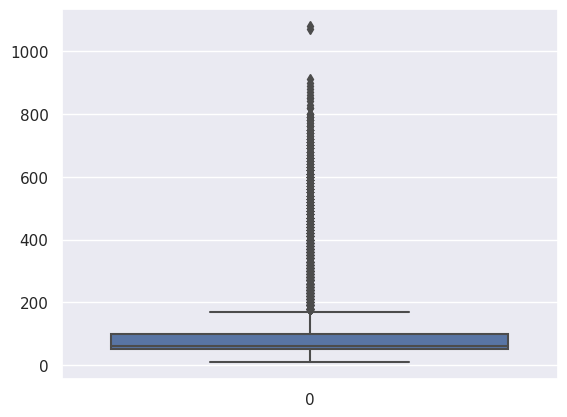

In [ ]:
# boxplot for appliances
sns.set(style="darkgrid")
ax= sns.boxplot(sorted_appliances.Appliances)

In [ ]:
# Let's Remove the outliers
df_new = df.dropna()
df_new = df.drop(df[(df.Appliances>140)|(df.Appliances<0)].index)

In [ ]:
df_new1 = df_new.copy()

In [ ]:
# Dropping the month, week,year column from df_new1
df_new1.drop(columns = (['month', 'week', 'year']), inplace = True)

## What all manipulations have you done and insights you found?

We first used the date column as the index of the dataset to extract the month, hour and week values. Then, we added these values in new columns.

To obtain the average energy used by the Appliances in an hour, we calculated the mean of all hourly energy values and created a new feature called 'hour_avg' that contains these average values for each hour.

We also created two additional features named Low_Consumption' and High_Consumption. These columns contain 0s and 1s indicating whether the hourly average energy used is below the Appliances value plus 25, for 'Low Consumption', or above the Appliances value plus 100, for 'High Consumption'.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1

###**Let's check temperature variation of all the rooms of building**

In [ ]:
# assigning values to variables
T1 = df['T1'].values.mean()
T2 = df['T2'].values.mean()
T3 = df['T3'].values.mean()
T4 = df['T4'].values.mean()
T5 = df['T5'].values.mean()
T7 = df['T7'].values.mean()
T8 = df['T8'].values.mean()
T9 = df['T9'].values.mean()
#these variables will hold the mean value of the columns in the DataFrame.
#excluded the temperatures T6 and T_out because they are the temperatures of outside.

Text(0, 0.5, 'Values')

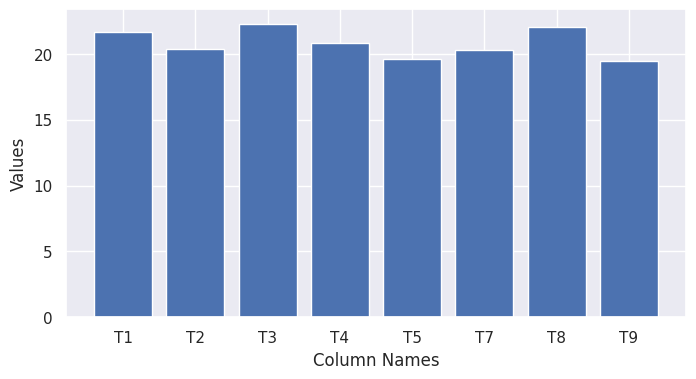

In [ ]:
# Figure Size
figure = plt.figure(figsize = (8,4))
values = [T1,T2,T3,T4,T5,T7,T8,T9]
column_names = ['T1','T2','T3','T4','T5','T7','T8','T9']

plt.bar(column_names,values)
plt.xlabel('Column Names')
plt.ylabel('Values')


### 1. Why did you pick the specific chart?

### Answer - To check the variation of temperature among all rooms . we chose bar plot to distinguish these two different type of values effectively.

### 2. What is/are the insight(s) found from the chart?

### The highest temperatures were recorded in the laundry room (T3), teenager's room (T8), and kitchen area (T1), while the lowest temperatures were recorded in the bathroom (T5) and parents' room (T9).

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### There is a direct relationship between energy usage and room temperature, which implies that it is necessary to regulate the areas with higher temperatures. In other words, controlling the temperature in rooms is crucial as it is directly proportional to the amount of energy consumed.

##**Chart - 2**

## **Let's check the variation of energy with respect to the outside temperature**

In [ ]:
# assigning values to variables
T6 = df['T6'].values
T_out = df['T_out'].values
Appliance_energy = df['Appliances'].values

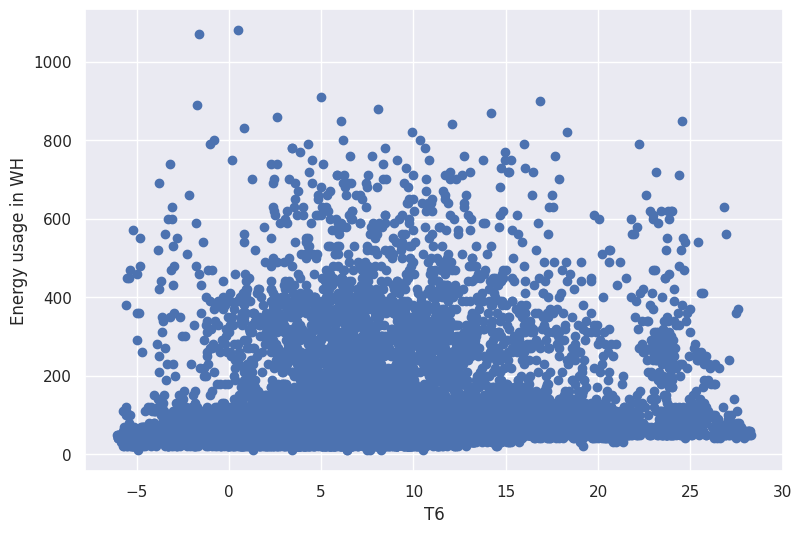

Text(0.5, 1.0, 'Appliances and T6- correlation: 0.11763768942238202')

In [ ]:
#scatter plot of Temperature vs Energy usage
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T6']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T6')
plt.ylabel('Energy usage in WH')
plt.show()
ax.set_title('Appliances and' + ' T6' + '- correlation: ' + str(correlation))

### 1. Why did you pick the specific chart?

### Answer - we chose scatter plot because it is useful visualization tool to represent the relationship between two variables.

### 2. What is/are the insight(s) found from the chart?

###There is a slight correlation between energy usage and temperature on the north side of the building. The energy usage remains relatively stable between temperatures of 5° to 25° Celsius. However, energy usage is lower during extreme high and low temperatures.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the plot, it appears that monitoring the outdoor temperature could help reduce the use of air conditioners in the building.

##**Chart - 3**

## **Scatter plot of Temperature vs Energy usage**

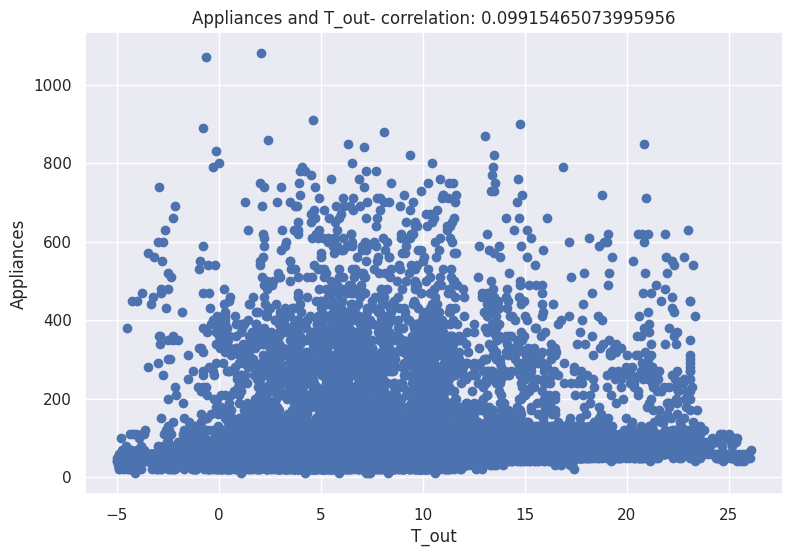

In [ ]:
# scatter plot
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T_out']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T_out')
plt.ylabel('Appliances')

ax.set_title('Appliances and' +' T_out' + '- correlation: ' + str(correlation))
plt.show()

### 1. Why did you pick the specific chart?

 ### Answer - Scatter plot is useful visualization tool to represent the relationship between two variables.

### 2. What is/are the insight(s) found from the chart?

### Answer - The relationship between temperatures in a neighborhood and energy usage appears to be weak, as other factors such as energy-efficient buildings and individual behavior can affect energy consumption. However, it is worth noting that during periods of extreme high and low temperatures, there is a significant decrease in energy usage. This suggests that while temperature is not the only factor affecting energy consumption, it still has a noticeable impact on energy usage during extreme weather events.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - Plot indicates that checking outside temperature can reduce AC usage.

##**Chart - 4**

## **Energy consumption variation with respect to pressure**

Text(0.5, 1.0, 'Appliances and Press_mm_hg- correlation: -0.03488482908163532')

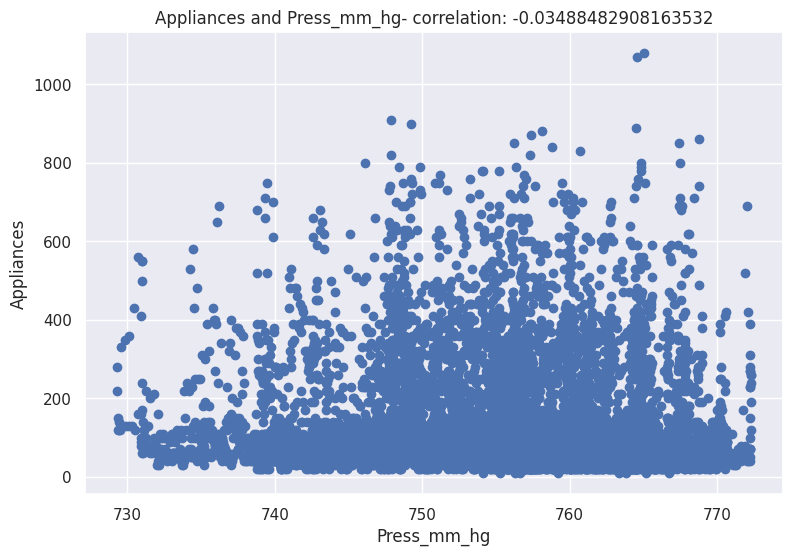

In [ ]:
# Scatter plot
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Press_mm_hg']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Press_mm_hg')
plt.ylabel('Appliances')
ax.set_title('Appliances and' + ' Press_mm_hg' + '- correlation: ' + str(correlation))

### 1. Why did you pick the specific chart?

 ### Answer - Scatter plot is useful visualization tool to represent the relationship between two variables.

### 2. What is/are the insight(s) found from the chart?

 ### Answer - Pressure and energy consumption have minimal to negligible correlation.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ### Answer - Humidity values can be disregarded as there is no significant correlation to be considered.

##**Chart - 5**

## **Variation of energy with respect to humidity for different rooms.**

In [ ]:
#Assigning values
RH1 = df['RH_1'].values.mean()
RH2 = df['RH_2'].values.mean()
RH3 = df['RH_3'].values.mean()
RH4 = df['RH_4'].values.mean()
RH5 = df['RH_5'].values.mean()
RH6 = df['RH_6'].values.mean()
RH7 = df['RH_7'].values.mean()
RH8 = df['RH_8'].values.mean()
RH9 = df['RH_9'].values.mean()
RH_out = df['RH_out'].values.mean()

<BarContainer object of 10 artists>

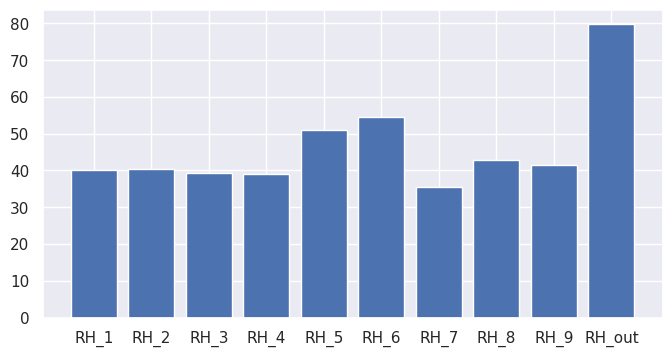

In [ ]:
fig = plt.figure(figsize=(8,4))
values = [RH1,RH2,RH3,RH4,RH5,RH6,RH7,RH8,RH9,RH_out]
names = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
# Horizontal bar plot
plt.bar(names,values)


### 1. Why did you pick the specific chart?

 ### Answer -  We chose bar plot beacuse bar plots are a useful tool for analyzing and presenting categorical data, Such as counts or frequencies of different categories.

### 2. What is/are the insight(s) found from the chart?

 ### Answer - At RH_out(outside) humidity is at its maximum, while the humidity inside the R7 is at its minimum.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - Humidity is highest at outside and lower inside the building. So, this figure should be kept maintained and try for more improvement.

##**Chart - 6**

## **Humidity in different area of building Vs Appliances**

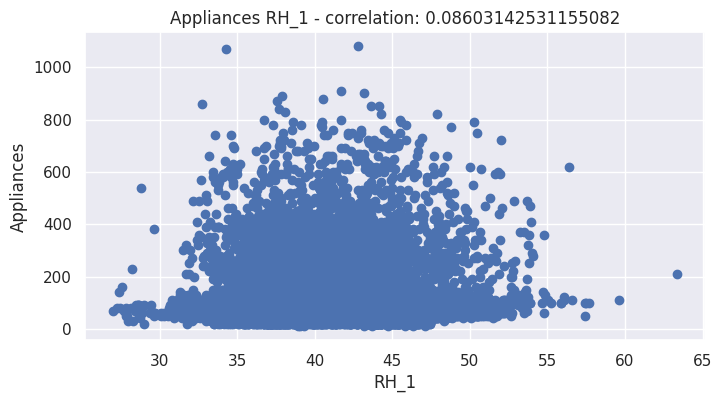

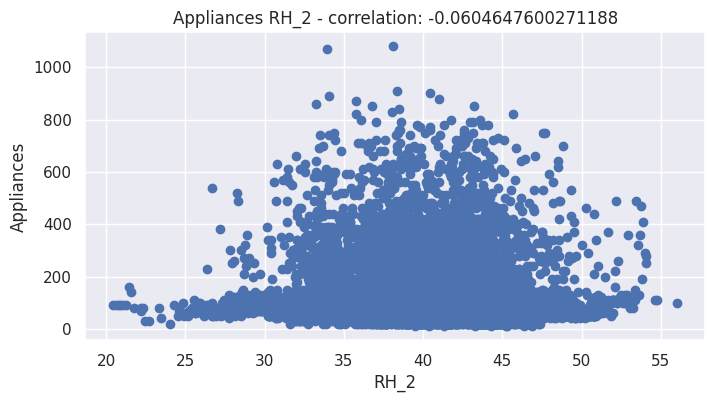

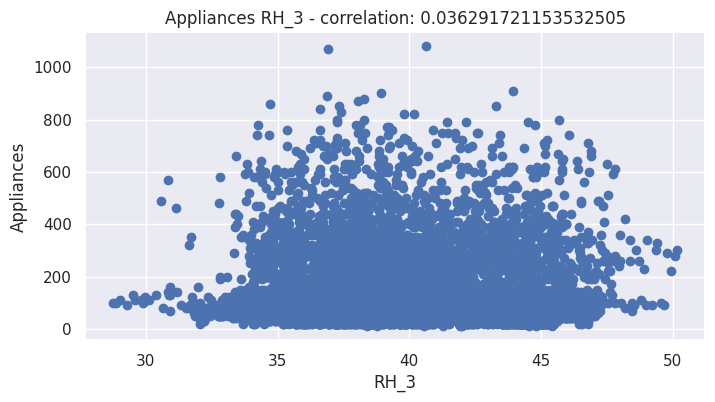

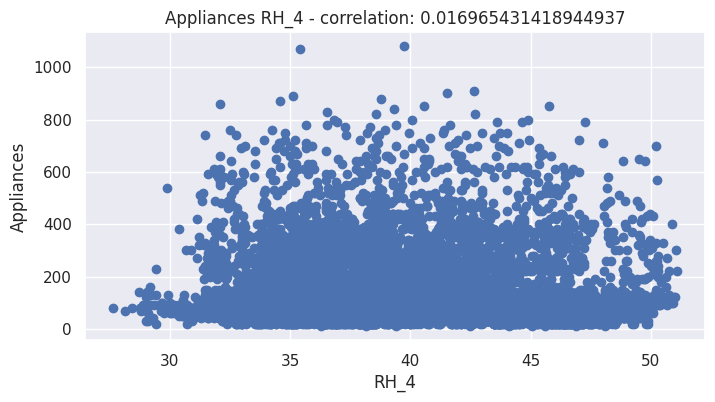

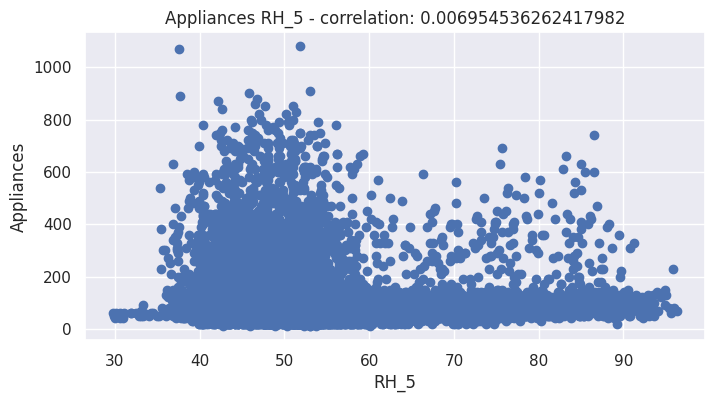

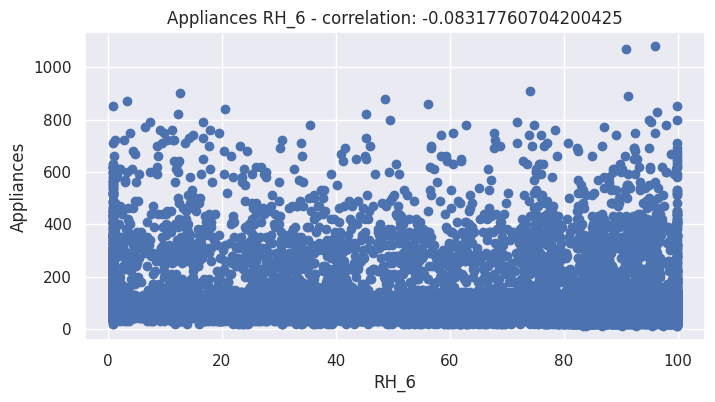

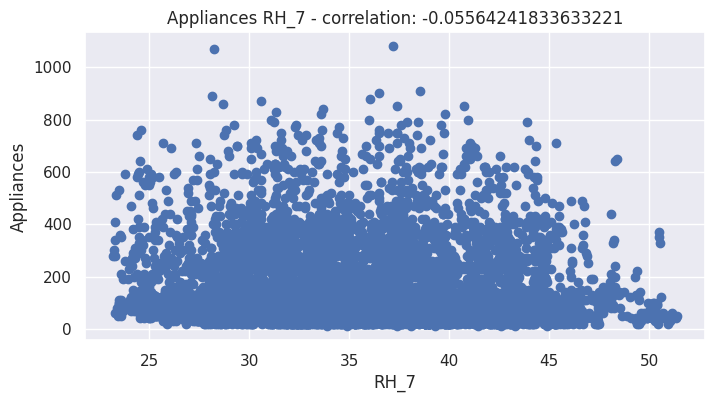

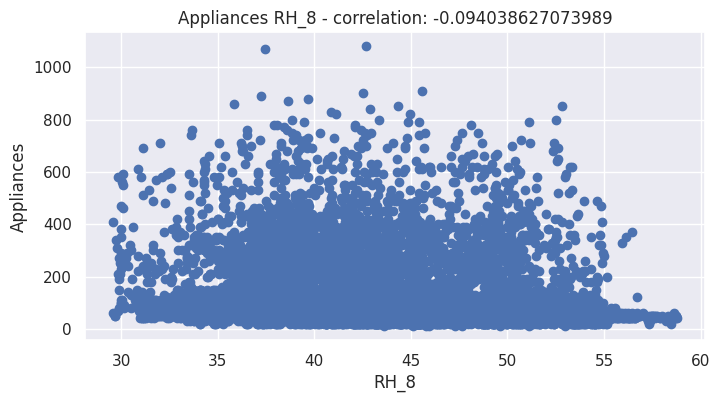

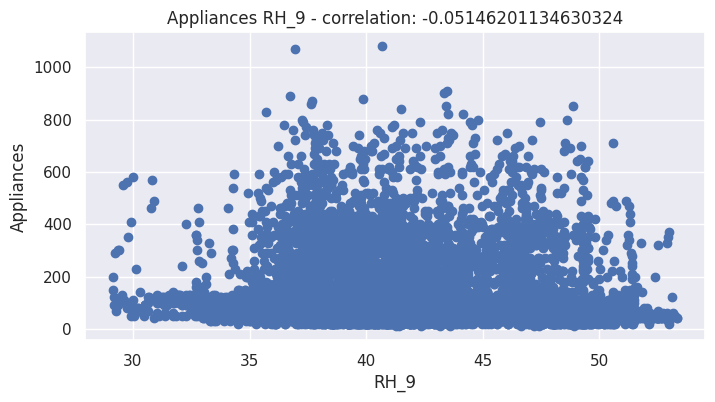

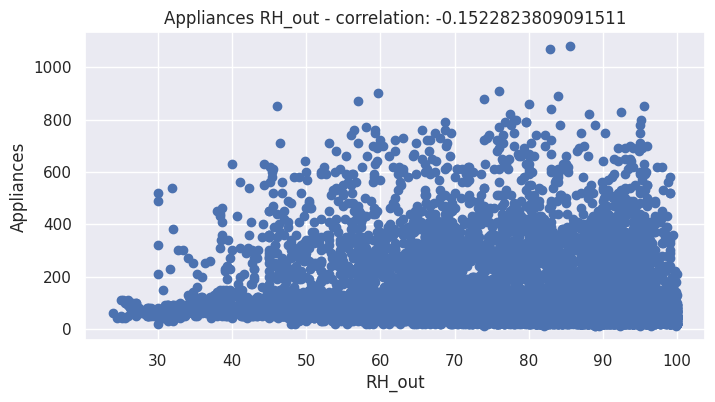

In [ ]:
for i in names:
  fig = plt.figure(figsize=(8,4))
  axis=fig.gca()
  feature = df[i]
  label= df['Appliances']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y= label)
  plt.xlabel(i)
  plt.ylabel('Appliances')
  axis.set_title('Appliances ' + i + ' - correlation: ' + str(correlation))
plt.show()

### 1. Why did you pick the specific chart?

 ### Answer - We chose because scatter plot is useful visualization tool to represent the relationship between two variables.

### 2. What is/are the insight(s) found from the chart?

 ### Answer -
### Insights of scatter plots between humidity in different rooms and energy consumption.

1.) The kitchen area's energy consumption appears to follow a normal distribution with respect to humidity levels. After the humidity reaches above 50, there is little to no energy consumption.

2.) In the living room, there is very low energy consumption for humidity levels between 20 to 30, with a sudden increase in consumption for adjacent levels of humidity.

3.) Similar to the living room, the humidity levels in the laundry room also influence energy consumption.

4.) The humidity levels in the office room appear to have little to no contribution towards energy consumption.

5.) Humidity levels in the bathroom do not seem to have any significant influence on energy consumption.

6.) Energy consumption may be negatively correlated to the humidity levels of the north side outside of the building.

7.) The humidity levels in the neighborhood of the building are highly negatively correlated to energy consumption.


### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ### Answer - There is an inverse relationship between humidity levels and energy use, meaning that energy consumption tends to increase as humidity decreases.

##**Chart - 7**

## Usages of appliances in different months

In [ ]:
len(df_new['month'].unique())

5

So, data taken from five months (January to May)

In [ ]:
months = df.groupby('month').sum()

<ipython-input-37-de359c94e33a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



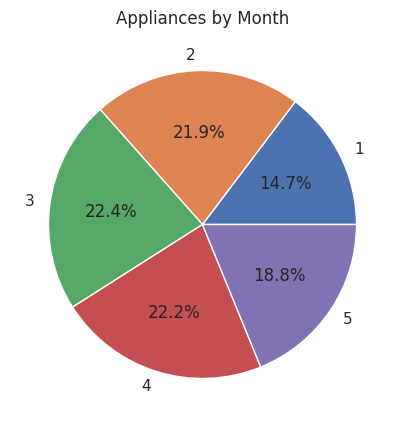

In [ ]:
# Create a pie chart of the 'Appliances' column
plt.figure(figsize=(5, 5))
plt.pie(months['Appliances'], labels=months.index, autopct='%1.1f%%')
plt.title('Appliances by Month')
plt.show()


### 1. Why did you pick the specific chart?

### Answer - A pie chart is a type of chart in Matplotlib that visualizes the proportions of different categories or values in a variable. It provides a quick and easy way to understand the distribution of data in a single variable.

### 2. What is/are the insight(s) found from the chart?



### Answer - By examining the pie chart, we can see that the consumption of appliances in the months of February, March, and April is roughly equal, while the usage in January is the lowest among all the months.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - The lower energy usage in January . May be it is due to lower temperatures during that month.

##**Chart - 8**

## Let's check energy consumption of different days

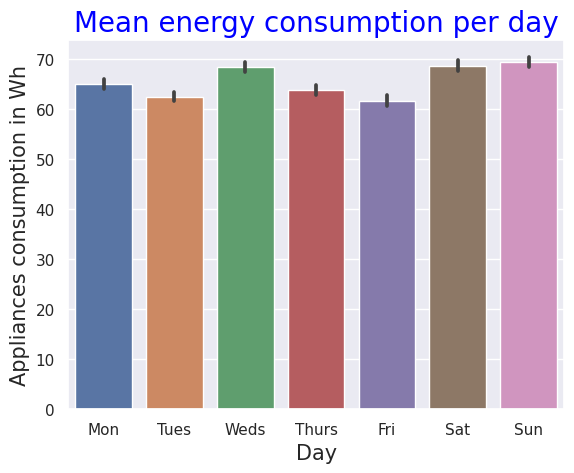

In [ ]:
# Bar plot of mean energy consumption per day
sns.barplot(x='weekday', y='Appliances', data=df_new)
ticks = range(0,7)
labels = labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day',size = 15)
plt.ylabel('Appliances consumption in Wh',size = 15)
plt.title('Mean energy consumption per day',size = 20 , color = 'blue')
plt.xticks(ticks, labels);



### 1. Why did you pick the specific chart?

 ### Answer -  We chose bar plot beacuse bar plots are a useful tool for analyzing and presenting categorical data, Such as counts or frequencies of different categories.

### 2. What is/are the insight(s) found from the chart?

### Answer - Appliances consumption was highest on Monday and lowest on Tuesday, with higher usage on weekends (Friday, Saturday, Sunday) than weekdays.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - The day of the week with the highest energy usage is Wednesday, which can be attributed to it being the busiest day of the week.

## **Chart - 9**

## Let's check Usages of appliances according to hours

In [ ]:
#Creating dataframe of sum of hour's column
df_all_hours = df.groupby('hour').sum()['Appliances']

<ipython-input-40-418824099b20>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



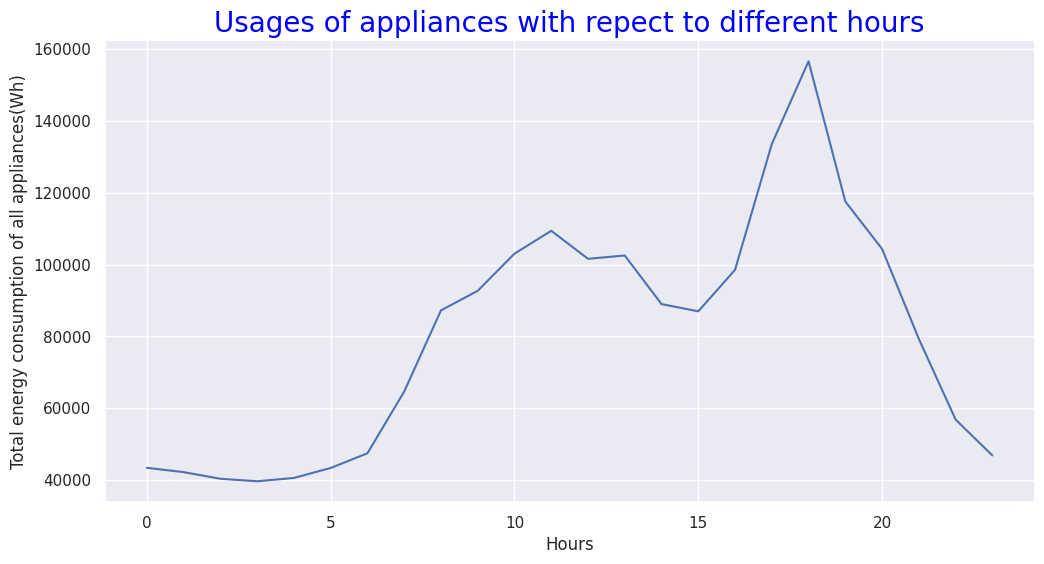

In [ ]:
#  Line plot of Usages of appliances according to hours (hours on x- axis)
plt.figure(figsize=(12,6))
plt.plot(df_all_hours)
plt.ylabel('Total energy consumption of all appliances(Wh)')
plt.xlabel('Hours')
plt.title('Usages of appliances with repect to different hours',size = 20 , color = 'blue')
plt.show()
# y-axis represents the sum of total energy consumption of all appliances of all days in Wh

### 1. Why did you pick the specific chart?

### Answer - We chose Line plot because it is useful for showing how a variable changes in relation to another variable over time. It shows the trend of the data, whether it's increasing or decreasing, and how quickly it's changing.

### 2. What is/are the insight(s) found from the chart?

### Answer - The line plot shows a gradual increase in appliance usage from midnight, reaching its peak around 6 pm. Subsequently, there is a sudden drop from 9 pm. This might be due to nighttime when people tend to be less active.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - There is a noticeable peak in energy usage during a specific hour of the day. To reduce energy consumption, it would be helpful to be aware of this peak and make a conscious effort to reduce usage during that hour.

## **Chart - 10**

## Let's check usage of appliances with respect to weeks

Analysis of 20 weeks data (January to May)

In [ ]:
# Creating DataFrame (sum of all weeks)
df_weeks = df.groupby('week').sum()['Appliances']

<ipython-input-42-1e1e00be3d8b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



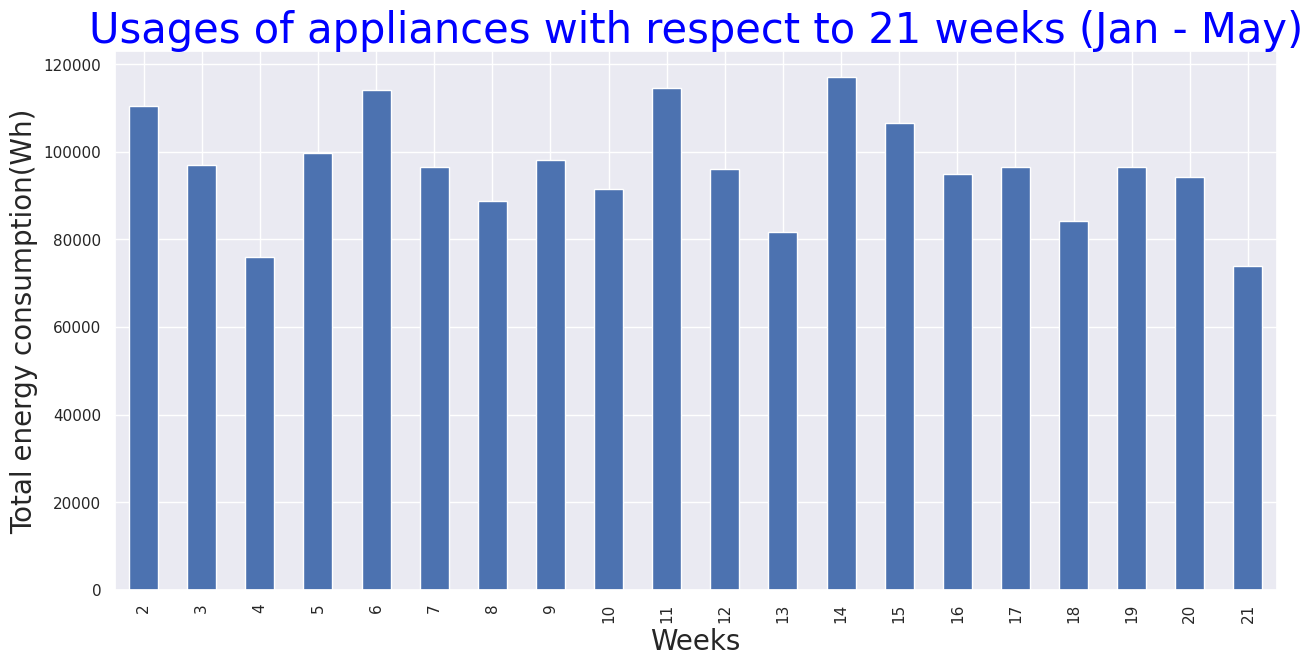

In [ ]:
# Bar plot for usages of appliances according to 21 weeks
df_weeks.plot.bar(figsize = (15,7))
plt.title('Usages of appliances with respect to 21 weeks (Jan - May)',size=30,color='blue')
plt.xlabel('Weeks',size = 20)
plt.ylabel('Total energy consumption(Wh)',size=20)
plt.show()

### 1. Why did you pick the specific chart?

### Answer -  We chose bar plot beacuse bar plots are a useful tool for analyzing and presenting categorical data, Such as counts or frequencies of different categories.

### 2. What is/are the insight(s) found from the chart?


### Answer - This bar plot displays the variations in the usage of appliances over a period of several weeks. Specifically, it indicates that the highest usage was observed in the second week of April (week 14), whereas the lowest usage was observed in the fourth week of May (the end of the period). These findings suggest that appliance usage fluctuated over time, with some weeks exhibiting higher or lower usage than others.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - Energy usage during the period from January to May appears to be irregular and unpredictable, with no clear pattern emerging over time.

## **Chart - 11**

##Histogram of all the columns to understand the distribution

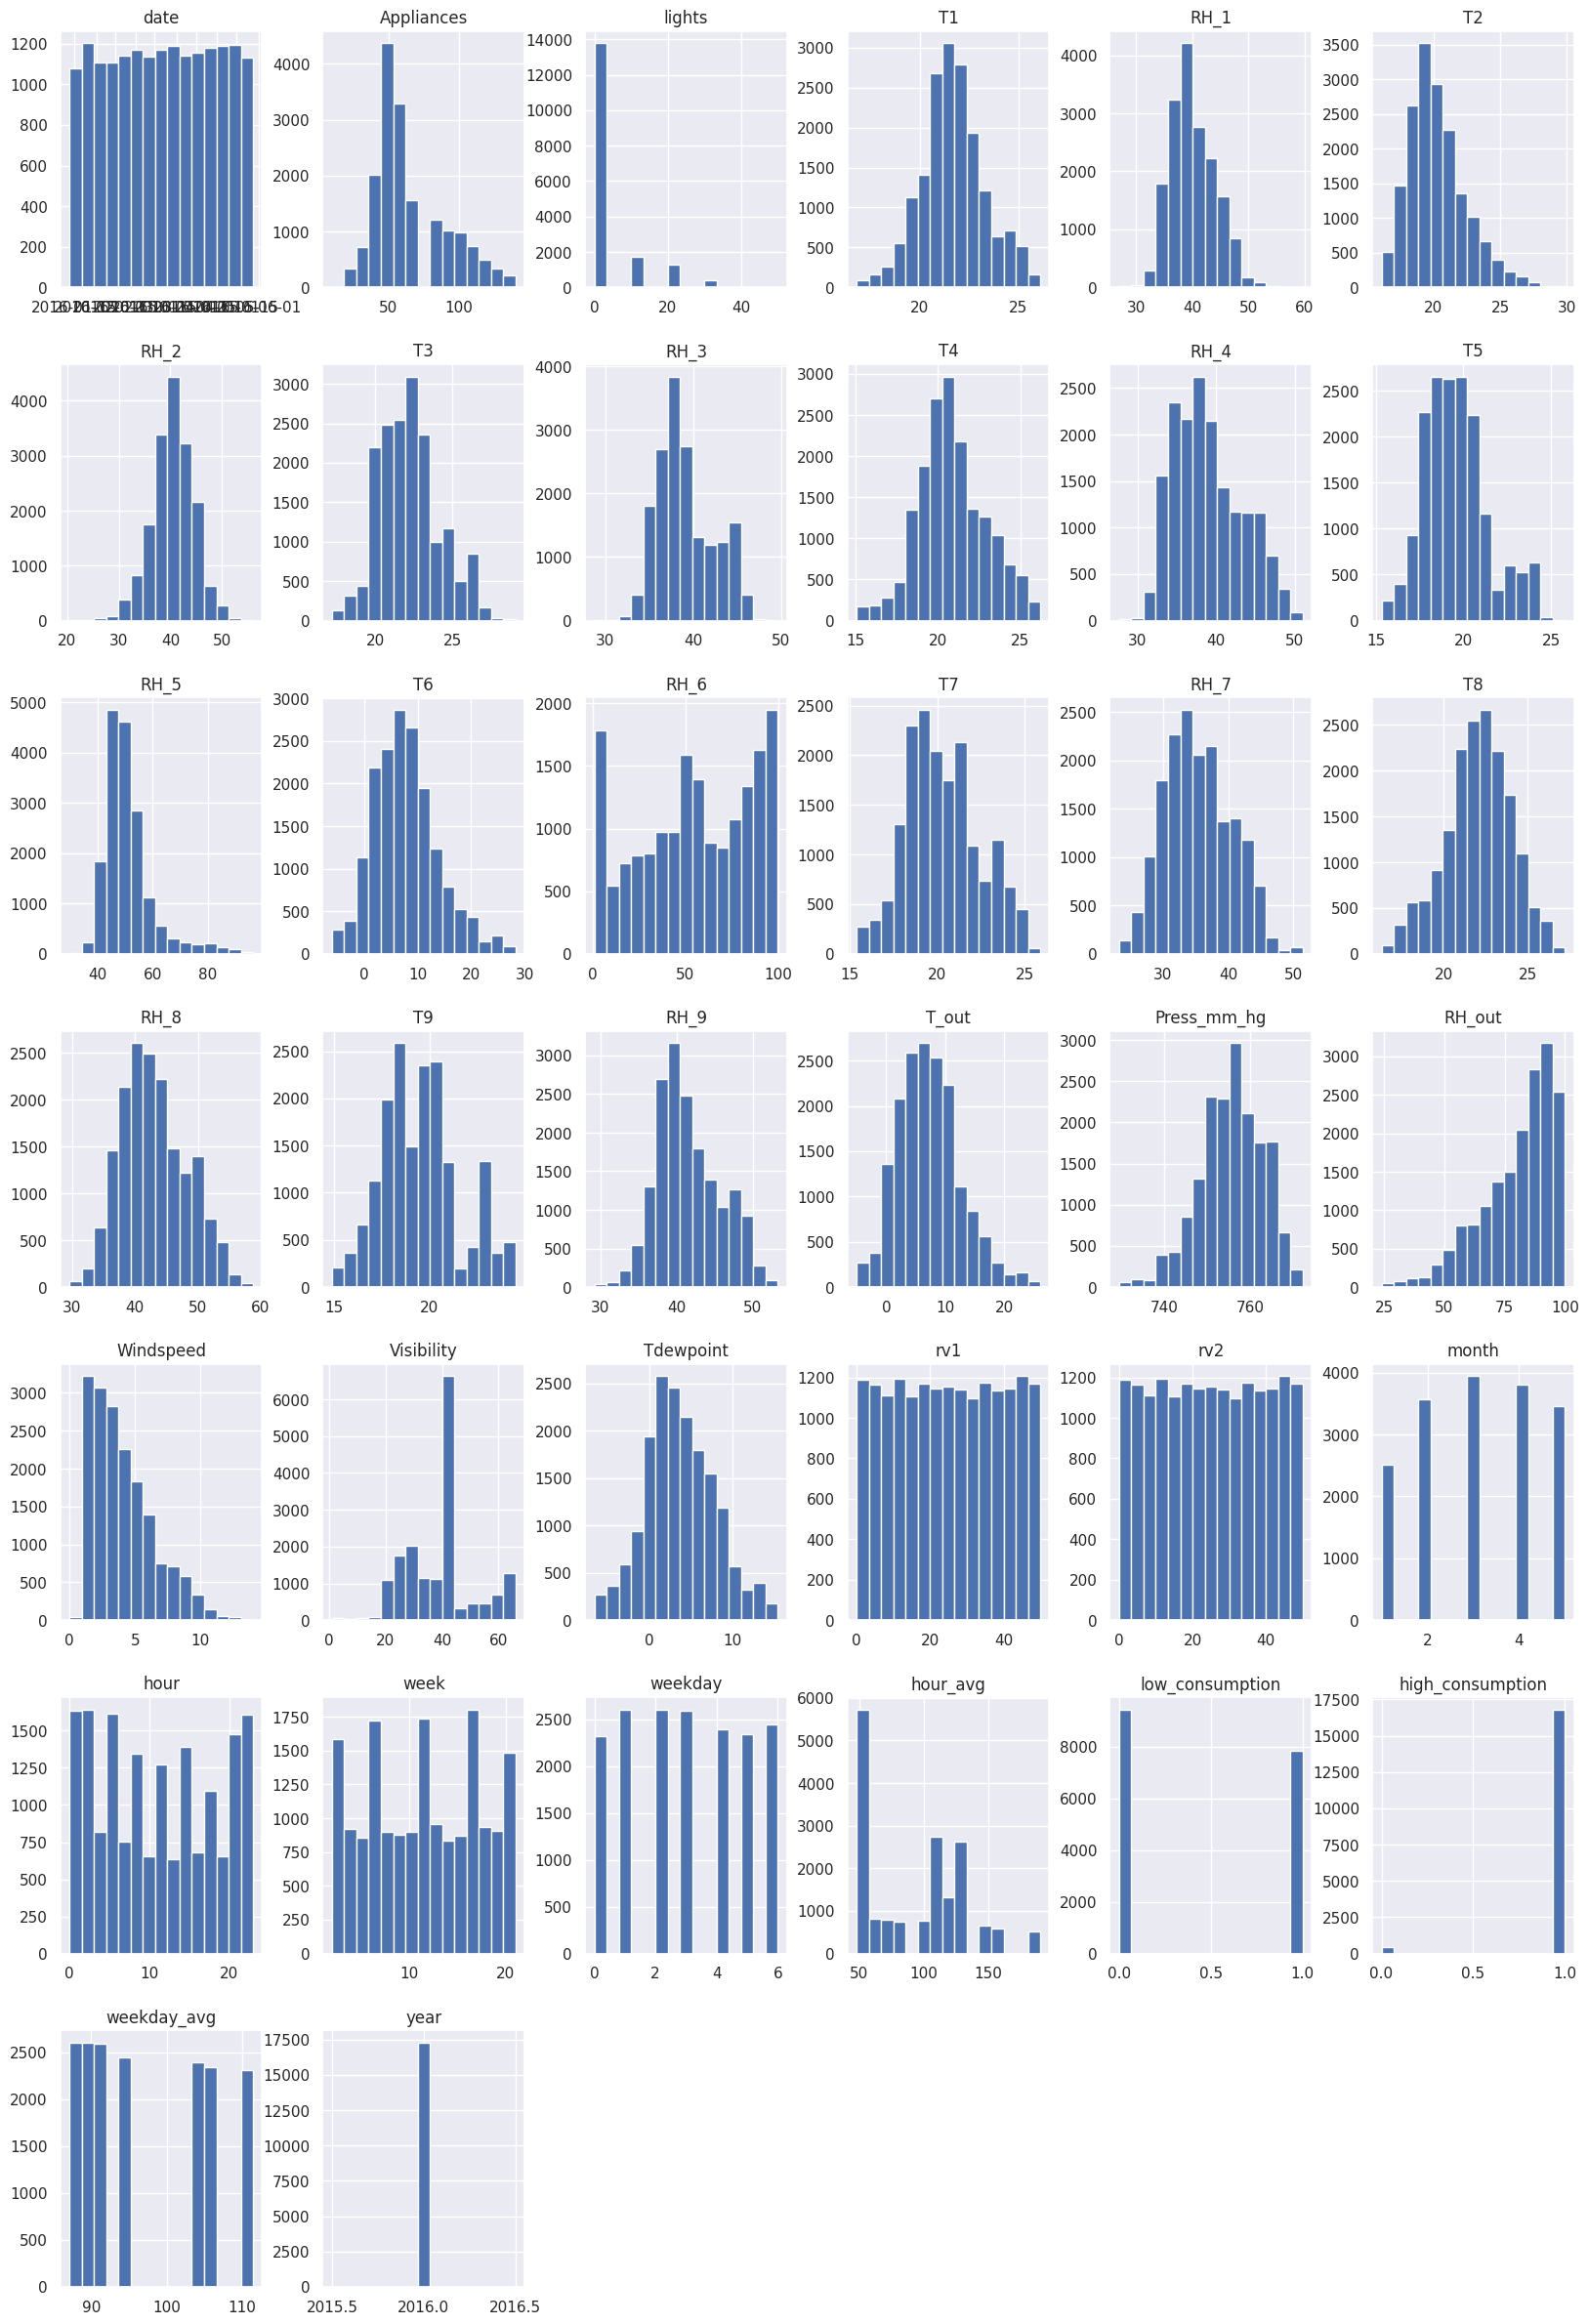

In [ ]:
#  Histogram of all columns
df_new.hist(bins = 15 , figsize= (20,30));

### 1. Why did you pick the specific chart?

### Answer - We chose Histogram beacuse they are useful for understanding the distribution and spread of data, identifying patterns and outliers, and comparing multiple datasets.

### 2. What is/are the insight(s) found from the chart?

### Answer - The histogram plots of the numeric features indicate that, aside from customer service calls, total international calls, and number of voicemail messages, the features display a Gaussian distribution with negligible skewness.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Answer - The objective is to determine if the distribution of data is skewed or if it follows a normal distribution. This analysis is being conducted without considering any potential business impact.

## **Chart - 12**

## Correlation plots between dependent and independent variables

<ipython-input-45-e9ae75995ab0>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



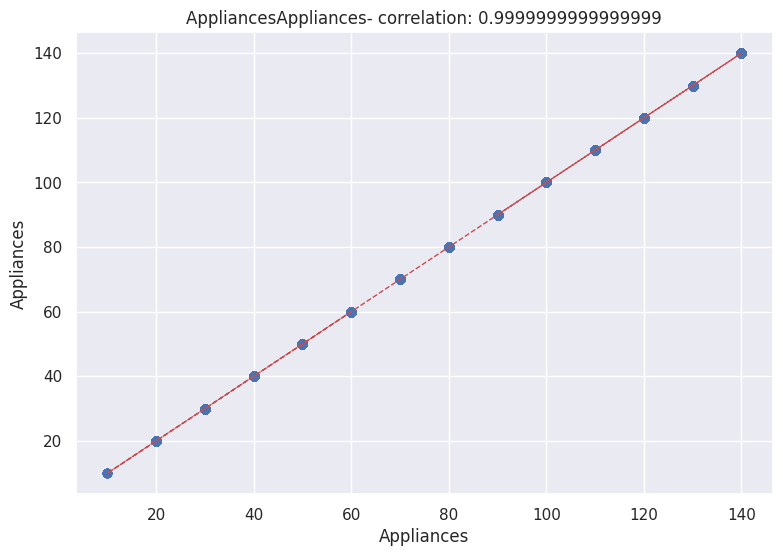

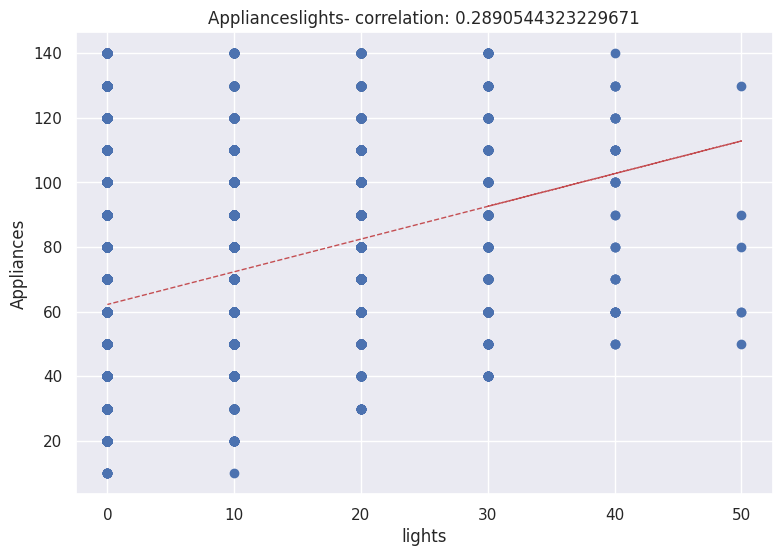

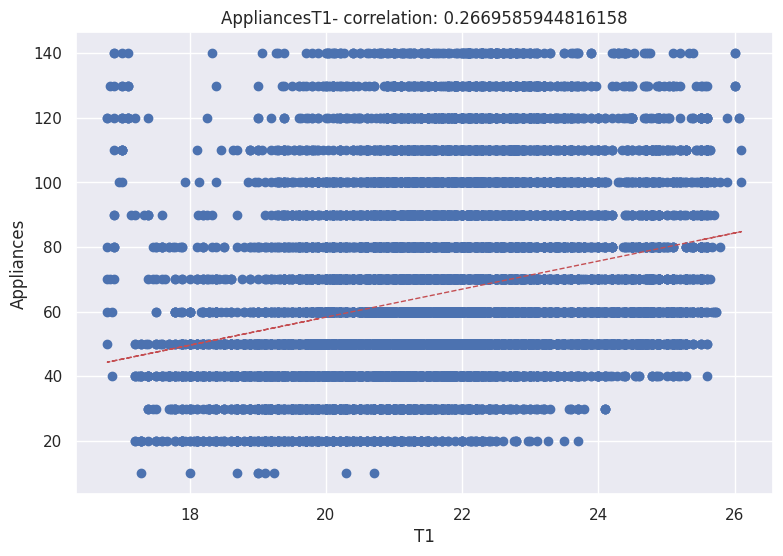

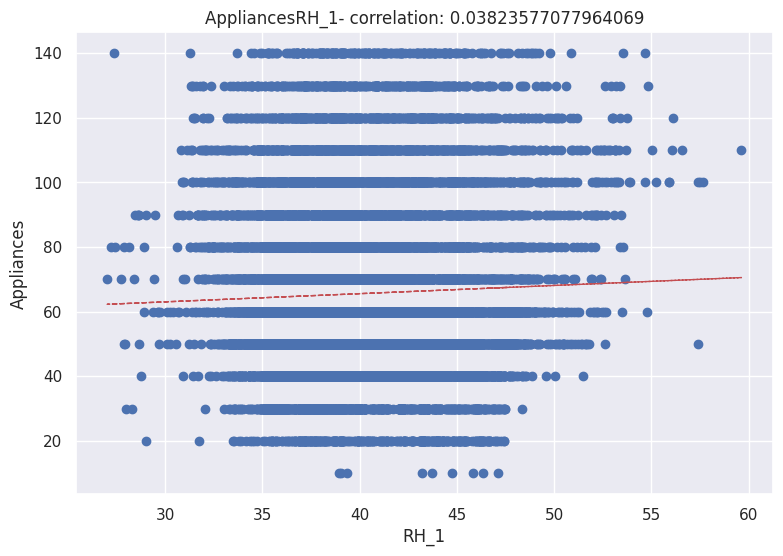

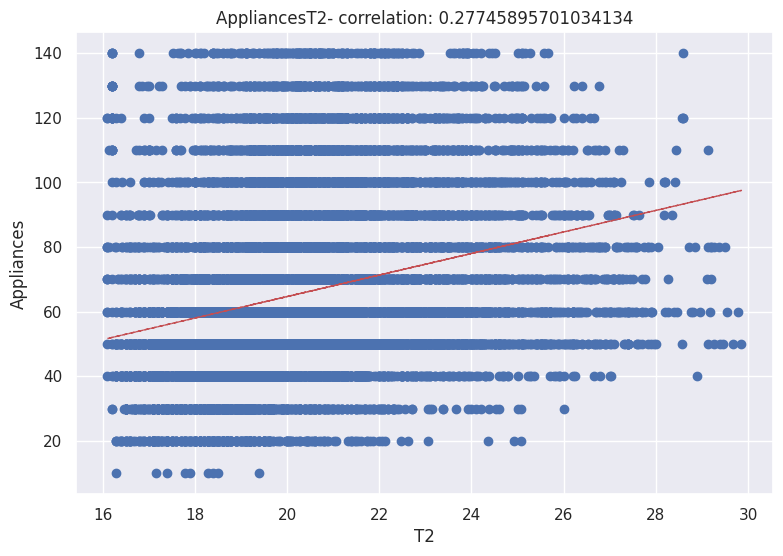

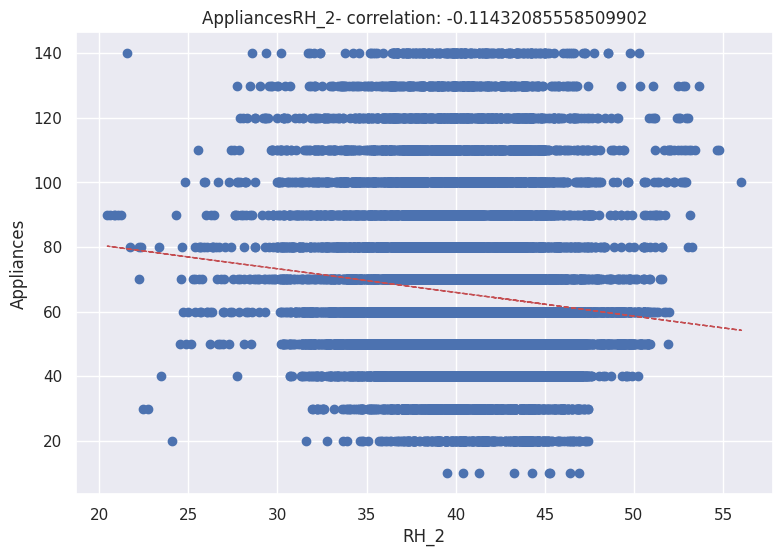

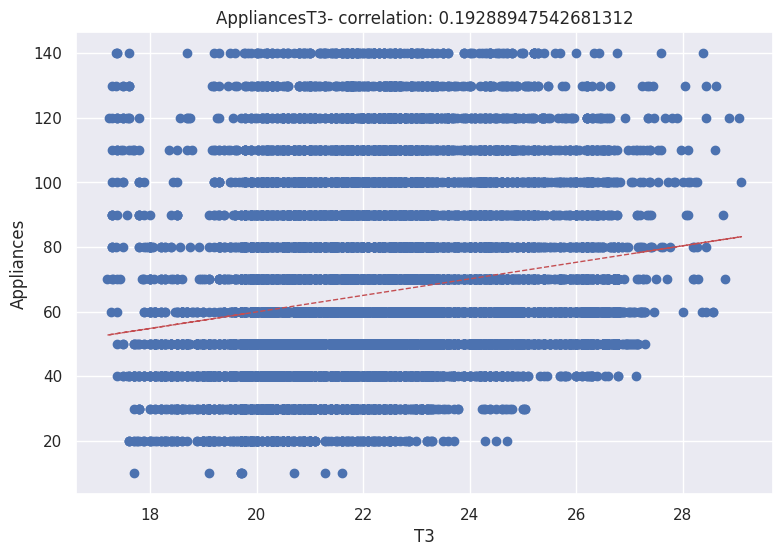

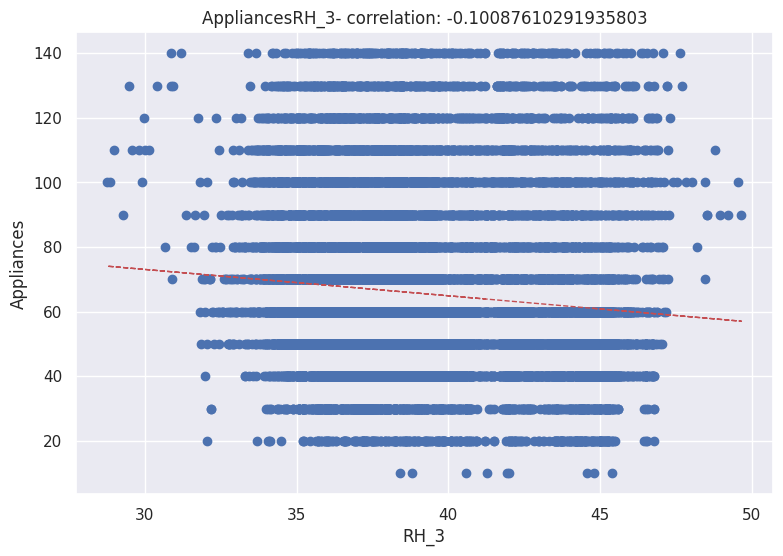

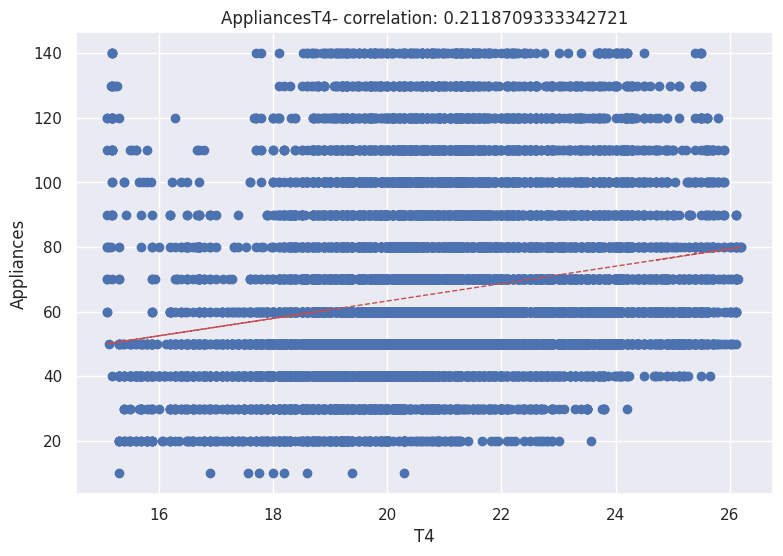

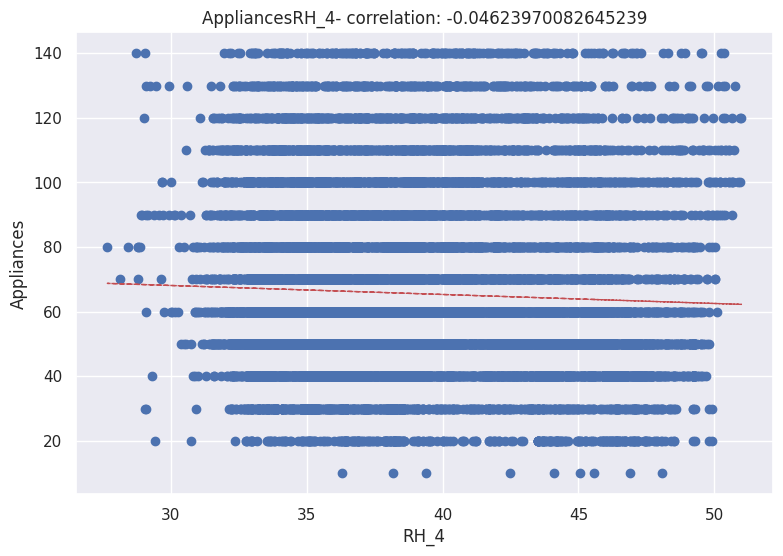

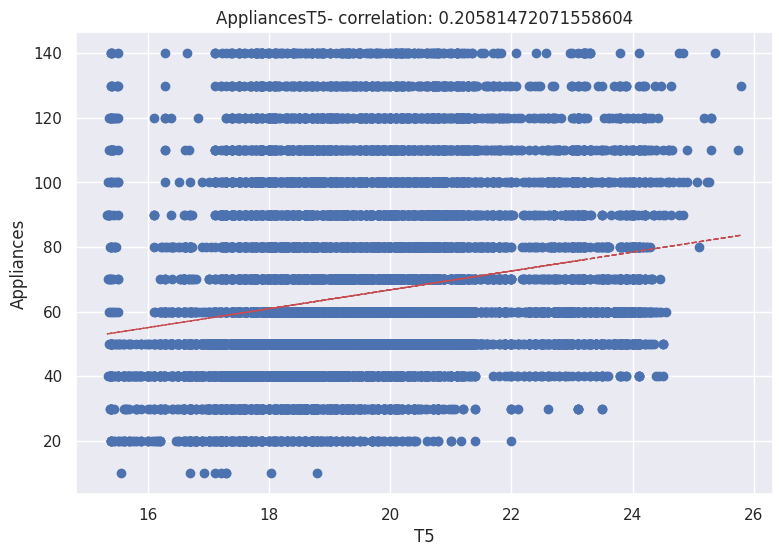

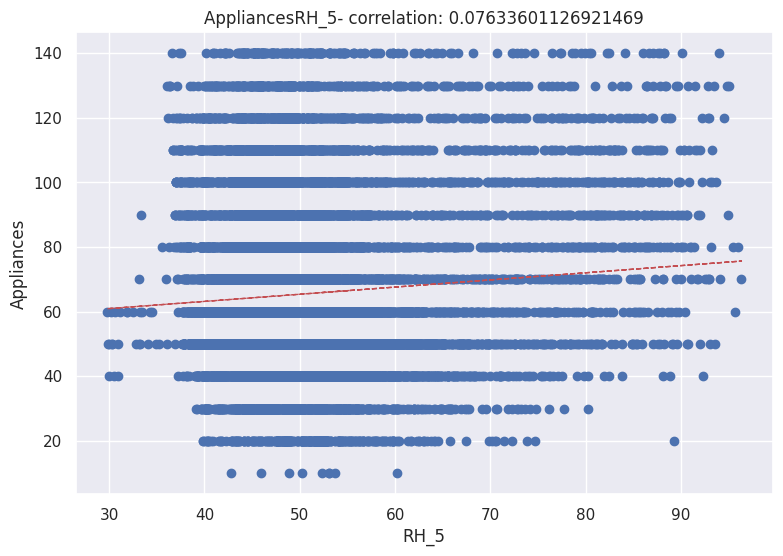

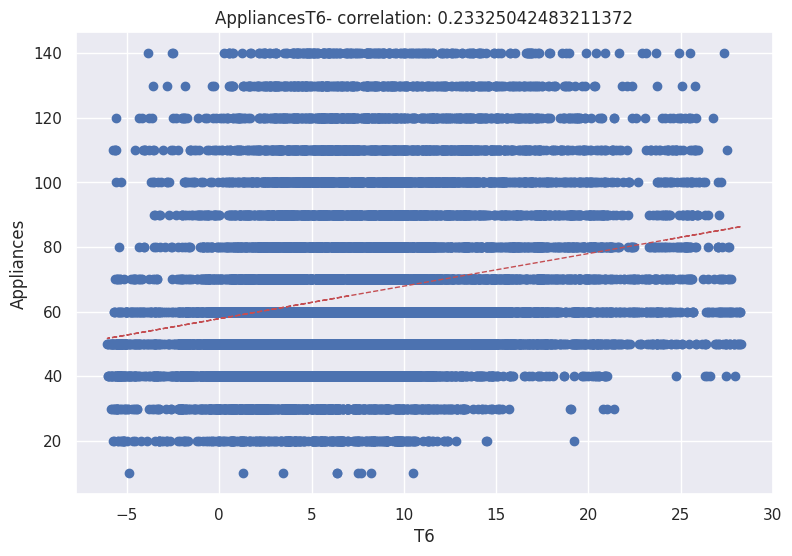

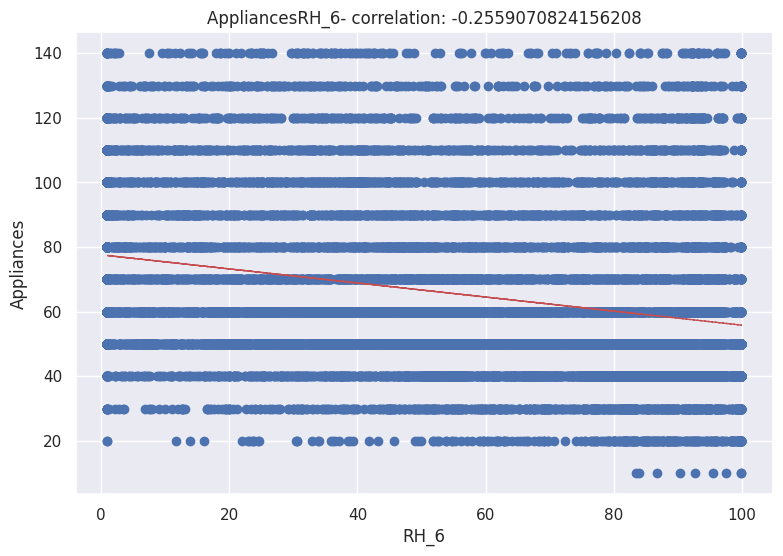

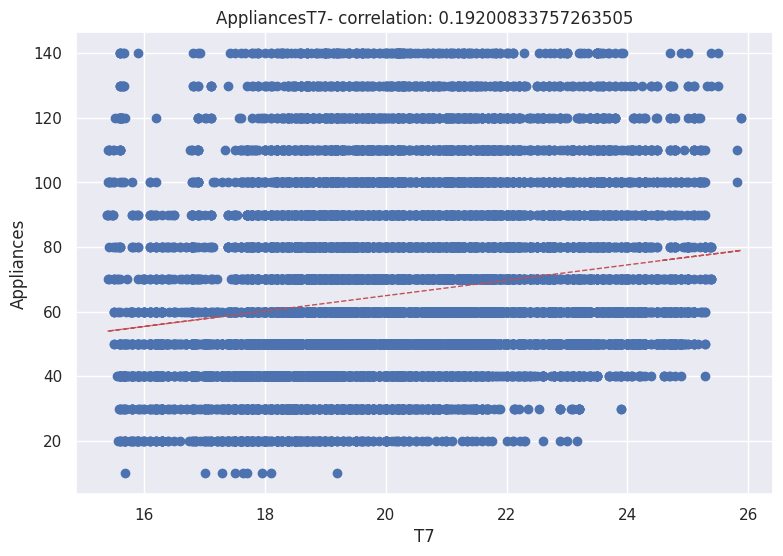

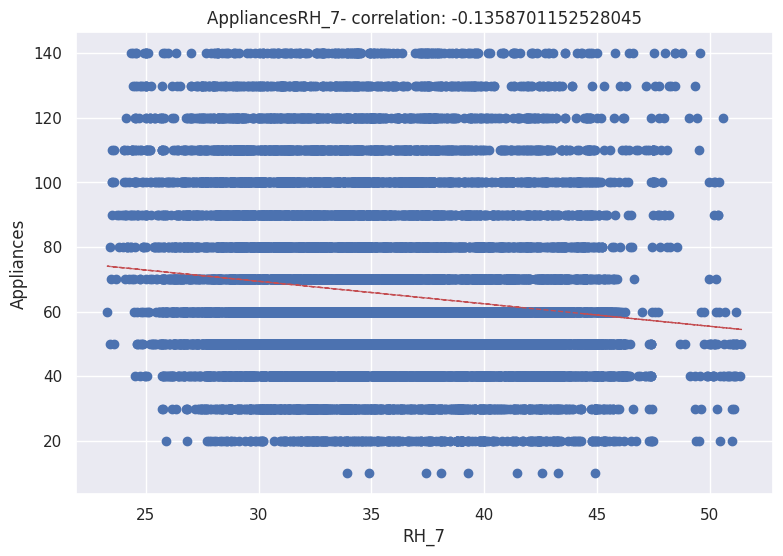

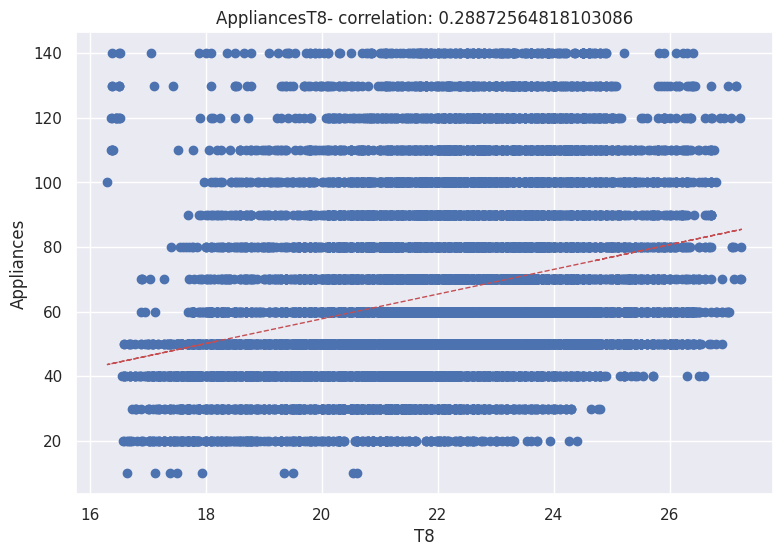

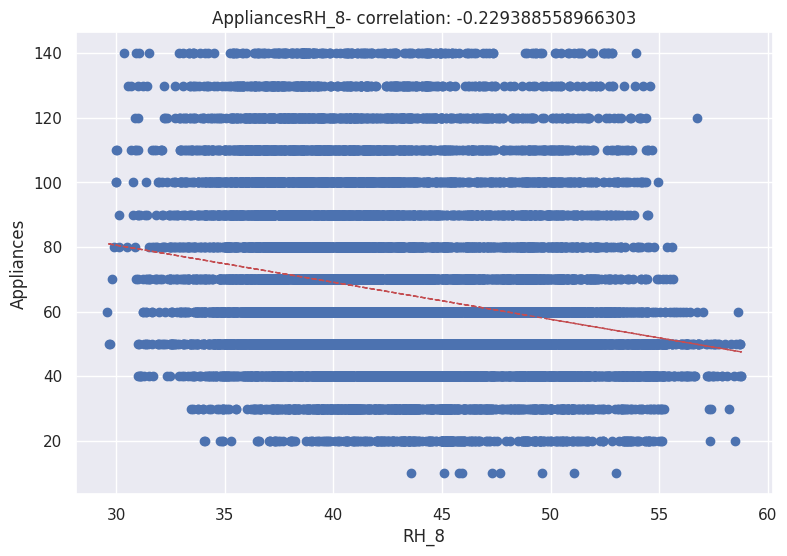

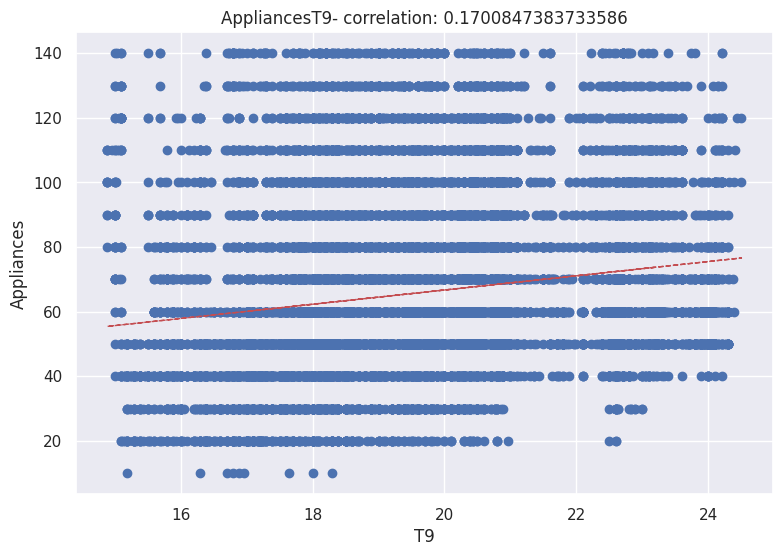

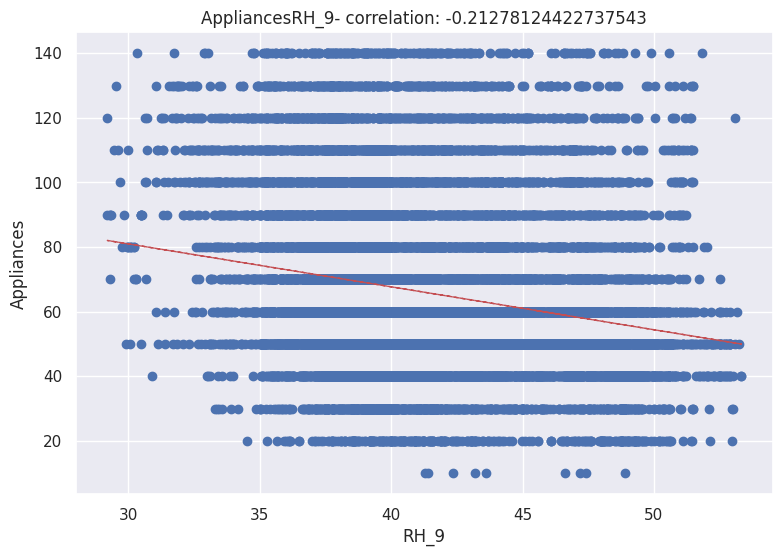

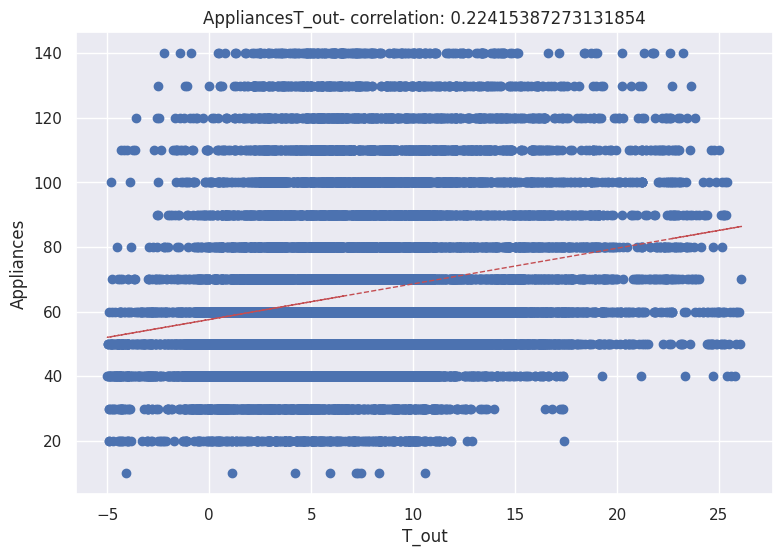

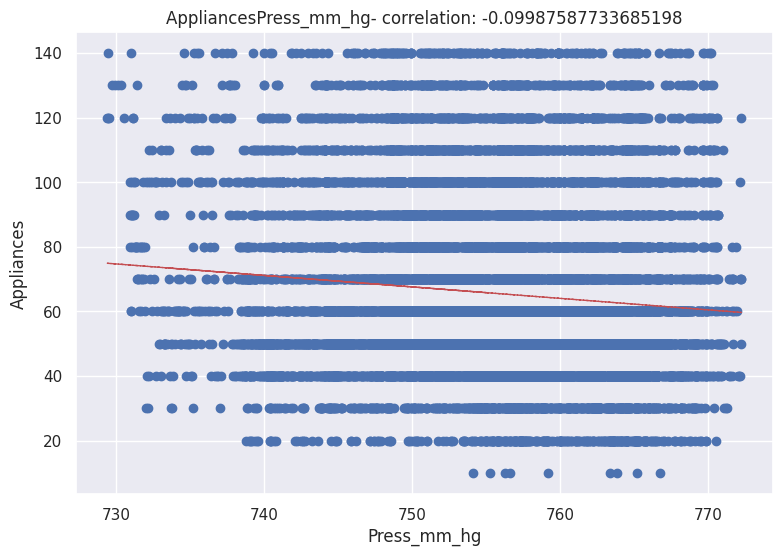

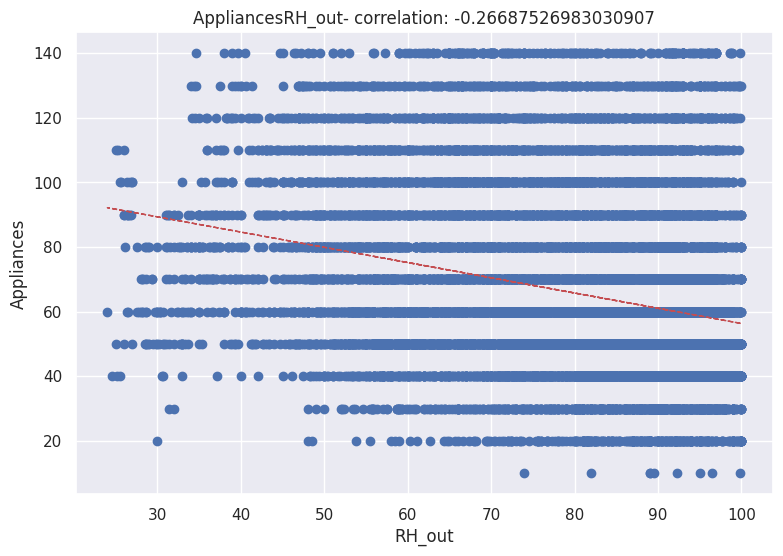

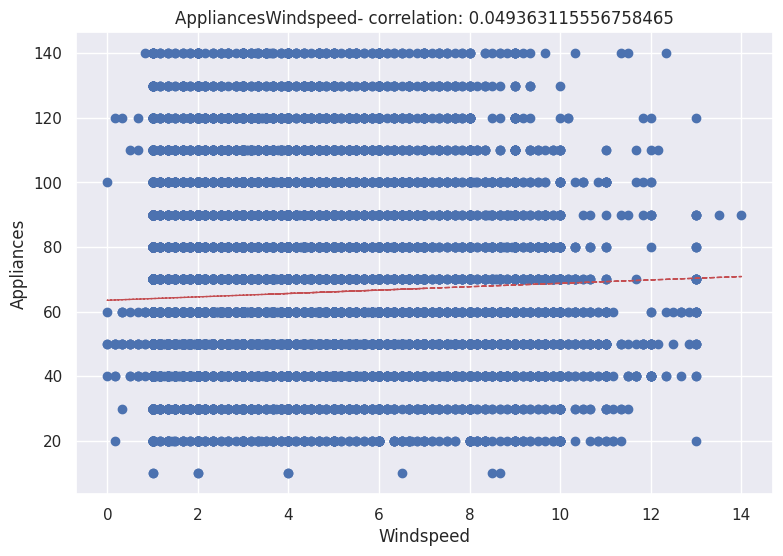

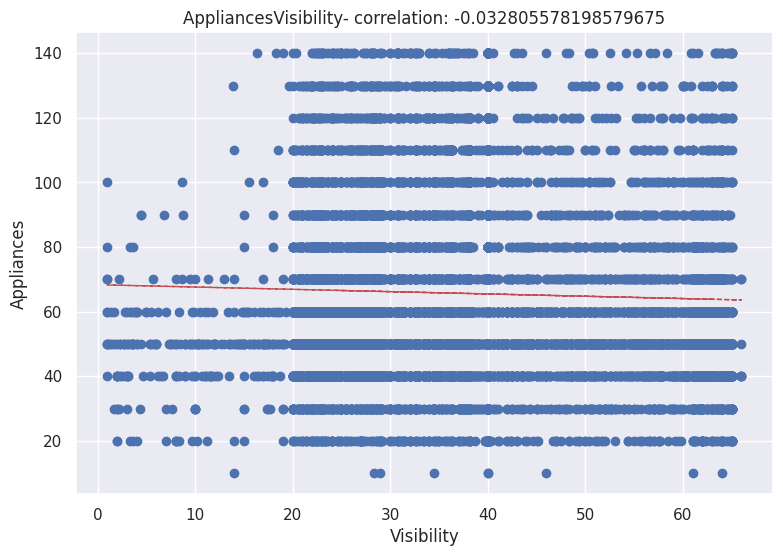

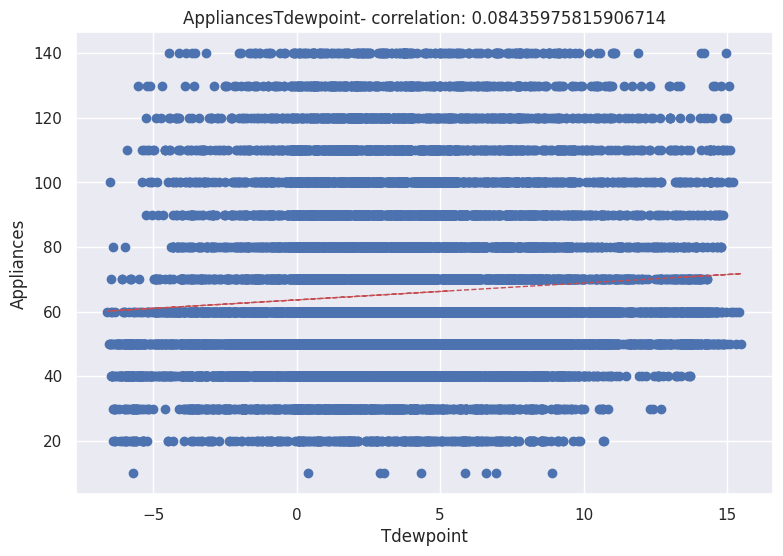

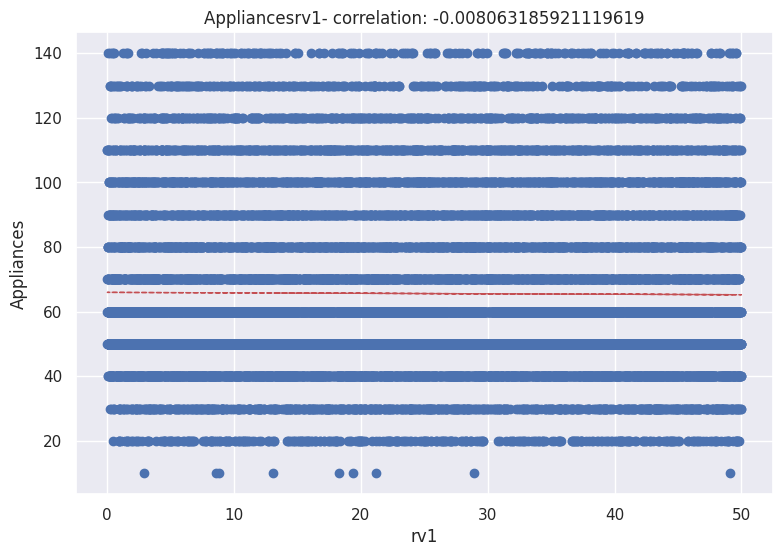

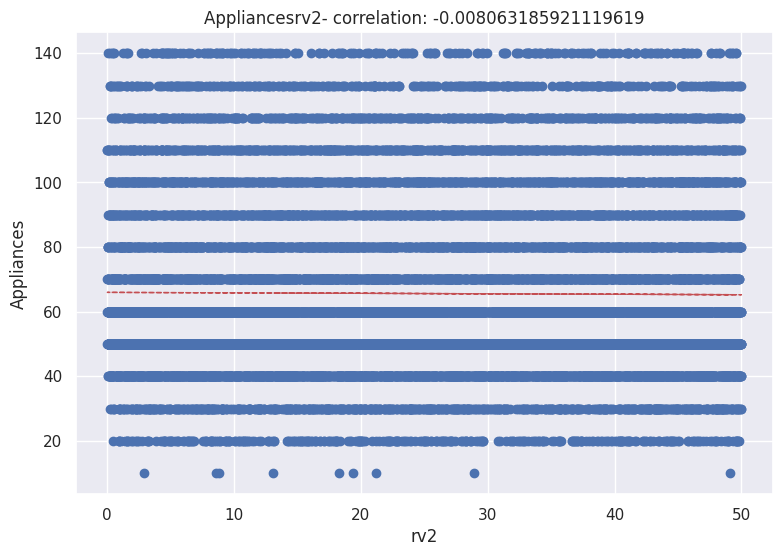

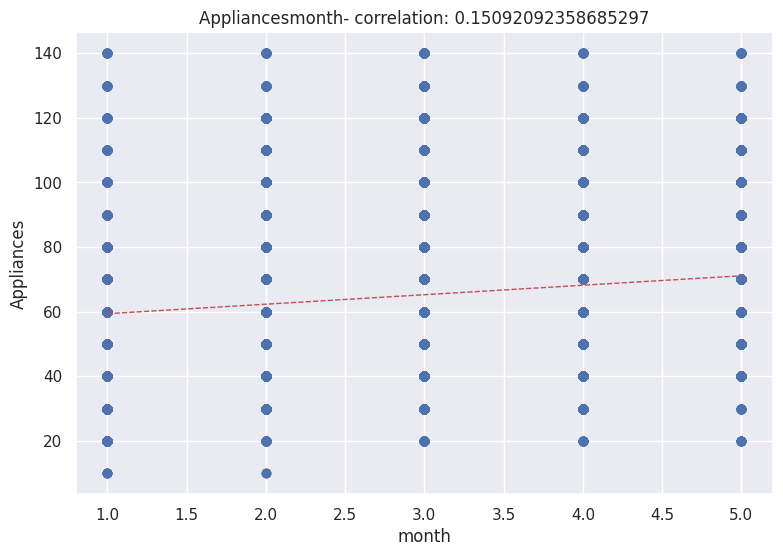

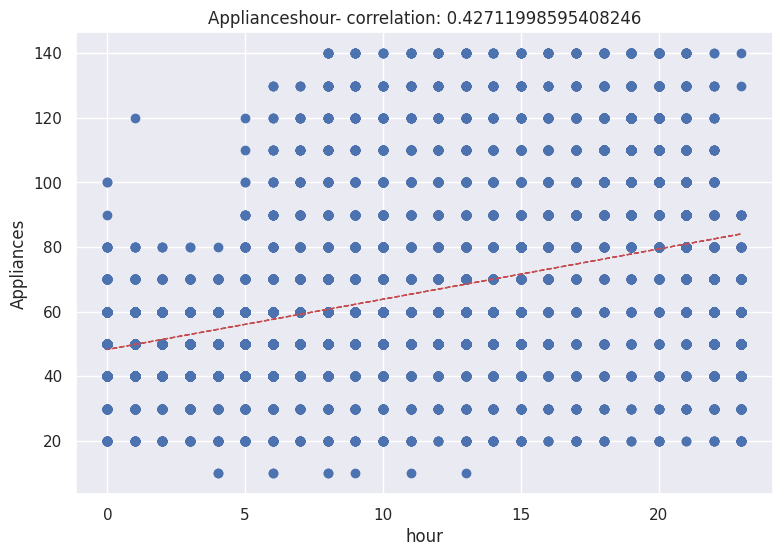

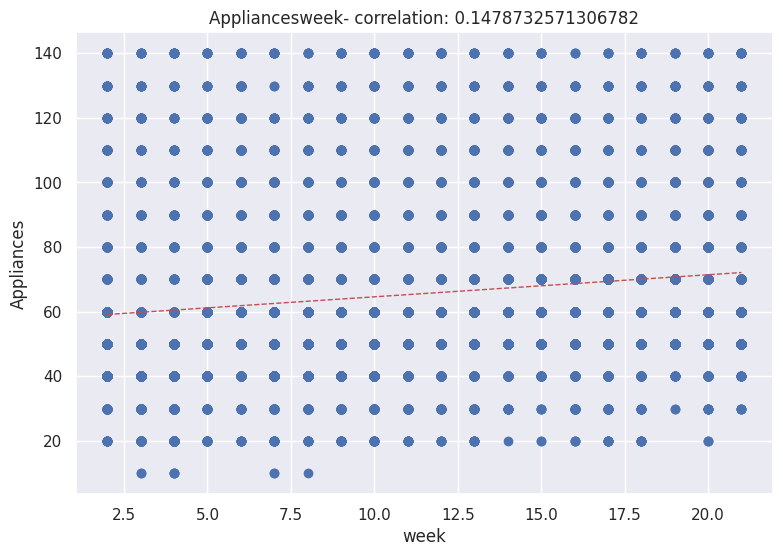

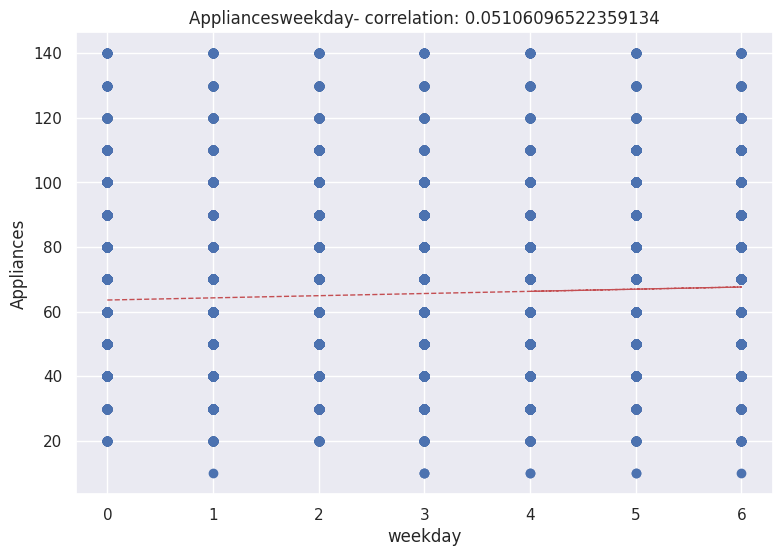

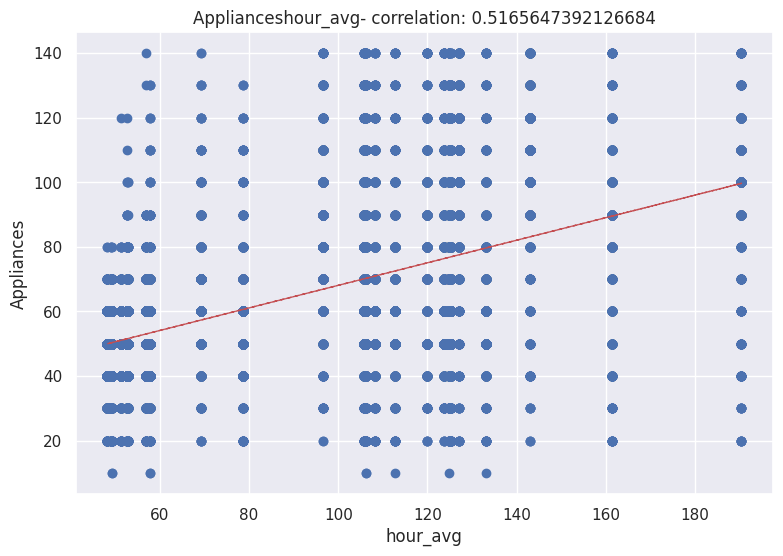

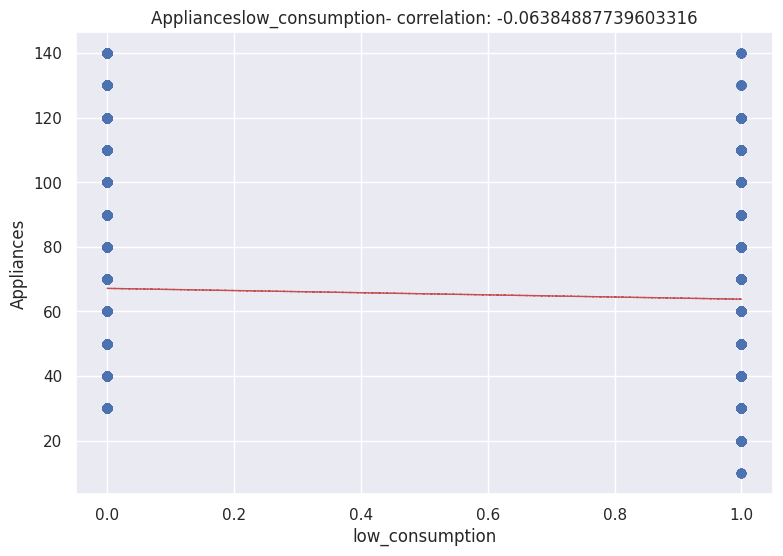

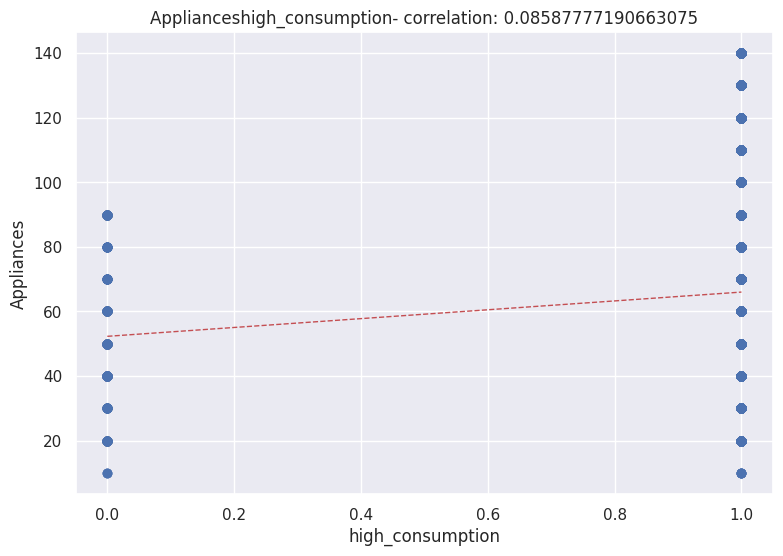

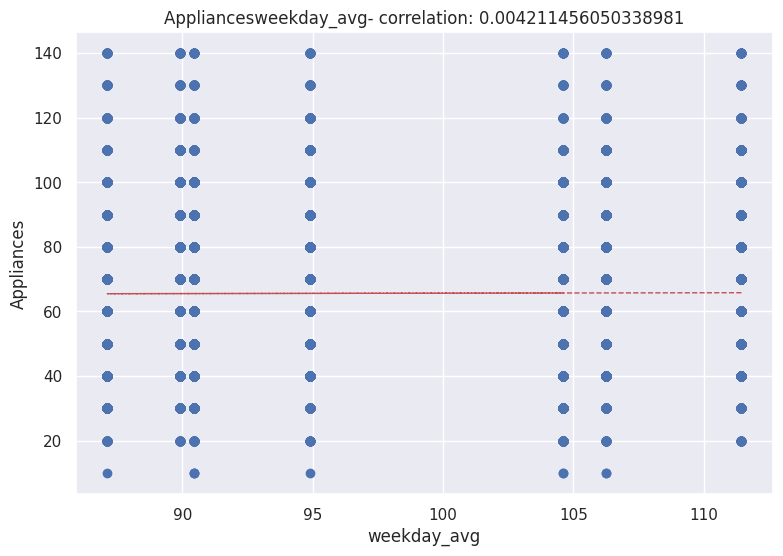

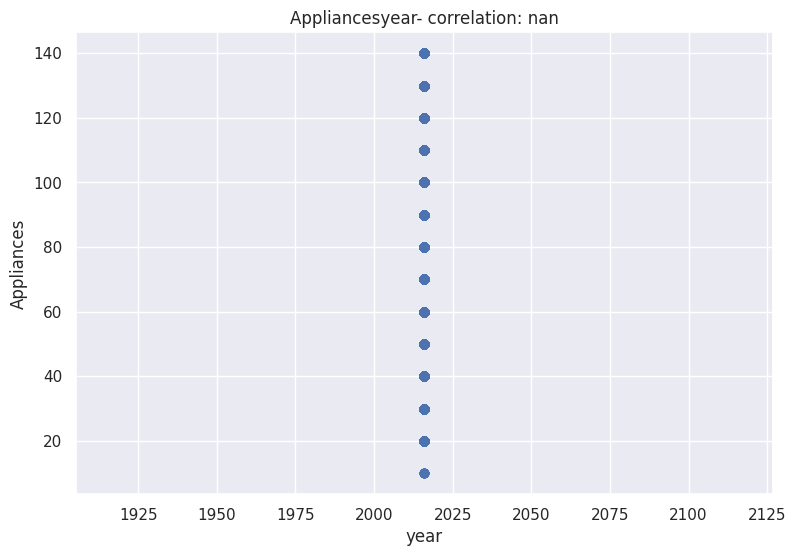

In [ ]:
# correlation plots between dependent and independent variables
numeric_features = df_new.columns
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df_new[col]
  label = df_new['Appliances']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_new[col], df_new['Appliances'], 1)
  y_hat = np.poly1d(z)(df_new[col])

  plt.plot(df_new[col], y_hat, "r--", lw=1)

plt.show()

###This code calculates the correlation coefficients between all the independent variables and the dependent variable in a dataframe.

In [ ]:
# Calculate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in scalar divide



variables           VIF
0             lights  1.332761e+00
1                 T1  2.193696e+01
2               RH_1  2.097320e+01
3                 T2  3.072352e+01
4               RH_2  2.507368e+01
5                 T3  1.295193e+01
6               RH_3  1.412268e+01
7                 T4  1.133556e+01
8               RH_4  1.887150e+01
9                 T5  1.088930e+01
10              RH_5  1.421235e+00
11                T6  3.455204e+01
12              RH_6  1.317687e+01
13                T7  1.883460e+01
14              RH_7  1.050482e+01
15                T8  8.765786e+00
16              RH_8  9.573157e+00
17                T9  3.334372e+01
18              RH_9  7.651672e+00
19             T_out  1.556204e+02
20       Press_mm_hg  1.463748e+00
21            RH_out  5.203398e+01
22         Windspeed  1.672407e+00
23        Visibility  1.049038e+00
24         Tdewpoint  8.752713e+01
25               rv1           inf
26               rv2           inf
27             month  2.844478e+01
28              hour  2.303148e+00
29              week  3.537431e+01
30           weekday  1.203103e+00
31          hour_avg  3.744711e+00
32   low_consumption  2.197115e+00
33  high_consumption  1.214870e+00
34       weekday_avg  1.109071e+00
35              year  2.155556e+04

In [ ]:
df_new.drop(columns=['rv2'],axis=1,inplace=True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date' ]]])

variables           VIF
0             lights      1.332761
1                 T1     21.936957
2               RH_1     20.973195
3                 T2     30.723515
4               RH_2     25.073680
5                 T3     12.951929
6               RH_3     14.122682
7                 T4     11.335558
8               RH_4     18.871498
9                 T5     10.889299
10              RH_5      1.421235
11                T6     34.552042
12              RH_6     13.176871
13                T7     18.834602
14              RH_7     10.504818
15                T8      8.765786
16              RH_8      9.573157
17                T9     33.343723
18              RH_9      7.651672
19             T_out    155.620351
20       Press_mm_hg      1.463748
21            RH_out     52.033983
22         Windspeed      1.672407
23        Visibility      1.049038
24         Tdewpoint     87.527135
25               rv1      1.001415
26             month     28.444778
27              hour      2.303148
28              week     35.374313
29           weekday      1.203103
30          hour_avg      3.744711
31   low_consumption      2.197115
32  high_consumption      1.214870
33       weekday_avg      1.109071
34              year  21555.556945

In [ ]:
df_new.drop(columns=['T1'],axis=1,inplace=True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

variables           VIF
0             lights      1.332618
1               RH_1     16.440510
2                 T2     18.618348
3               RH_2     20.275119
4                 T3     10.966780
5               RH_3     14.122675
6                 T4     10.922699
7               RH_4     18.869540
8                 T5     10.712613
9               RH_5      1.416365
10                T6     32.829407
11              RH_6     13.174832
12                T7     18.676441
13              RH_7     10.481514
14                T8      8.138685
15              RH_8      9.568214
16                T9     32.614249
17              RH_9      7.644569
18             T_out    154.068484
19       Press_mm_hg      1.461967
20            RH_out     51.927660
21         Windspeed      1.658399
22        Visibility      1.048312
23         Tdewpoint     87.479761
24               rv1      1.001406
25             month     28.427057
26              hour      2.267471
27              week     35.278330
28           weekday      1.200752
29          hour_avg      3.744167
30   low_consumption      2.179086
31  high_consumption      1.214556
32       weekday_avg      1.104392
33              year  21535.069492

In [ ]:
df_new.drop(columns=['T9'],axis=1,inplace=True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

variables           VIF
0             lights      1.310982
1               RH_1     16.440329
2                 T2     18.535707
3               RH_2     20.081774
4                 T3     10.772964
5               RH_3     14.107016
6                 T4     10.682373
7               RH_4     18.841800
8                 T5      9.829045
9               RH_5      1.407276
10                T6     32.187664
11              RH_6     13.171829
12                T7     13.558596
13              RH_7      9.915148
14                T8      8.092920
15              RH_8      9.560879
16              RH_9      7.503113
17             T_out    151.444921
18       Press_mm_hg      1.427509
19            RH_out     51.812956
20         Windspeed      1.656717
21        Visibility      1.048308
22         Tdewpoint     86.354897
23               rv1      1.001262
24             month     28.133290
25              hour      2.189799
26              week     34.788355
27           weekday      1.199911
28          hour_avg      3.740570
29   low_consumption      2.164398
30  high_consumption      1.213891
31       weekday_avg      1.104380
32              year  20891.229872

In [ ]:
df_new.drop(columns=['Press_mm_hg'],axis=1,inplace=True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

variables          VIF
0             lights     1.310850
1               RH_1    16.348656
2                 T2    18.519843
3               RH_2    20.081638
4                 T3    10.593907
5               RH_3    14.069250
6                 T4    10.545826
7               RH_4    18.641861
8                 T5     9.824436
9               RH_5     1.406631
10                T6    31.586846
11              RH_6    13.014441
12                T7    13.552026
13              RH_7     9.687463
14                T8     7.799603
15              RH_8     9.560875
16              RH_9     7.305037
17             T_out   151.405132
18            RH_out    51.750497
19         Windspeed     1.525287
20        Visibility     1.046023
21         Tdewpoint    86.205045
22               rv1     1.001261
23             month    27.116666
24              hour     2.188584
25              week    33.711911
26           weekday     1.197926
27          hour_avg     3.739938
28   low_consumption     2.164021
29  high_consumption     1.213890
30       weekday_avg     1.103371
31              year  3356.799406

In [ ]:
df_new.drop(columns=['RH_2', 'T2','RH_1', 'RH_4', 'RH_3','T7','T5'],axis=1,inplace=True)
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

variables          VIF
0             lights     1.256436
1                 T3     8.271101
2                 T4     6.503519
3               RH_5     1.311717
4                 T6    26.947118
5               RH_6    12.857447
6               RH_7     7.548026
7                 T8     4.756699
8               RH_8     7.163557
9               RH_9     5.848119
10             T_out   139.610031
11            RH_out    48.990941
12         Windspeed     1.505207
13        Visibility     1.039110
14         Tdewpoint    74.567803
15               rv1     1.001073
16             month    25.856442
17              hour     2.007131
18              week    30.163672
19           weekday     1.161236
20          hour_avg     3.273353
21   low_consumption     2.133372
22  high_consumption     1.183644
23       weekday_avg     1.071600
24              year  2784.401620

In [ ]:
df_new.drop(columns=['T3', 'T4','RH_7', 'RH_8', 'RH_9','RH_out', 'T_out'],axis=1,inplace=True)
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date']]])

variables         VIF
0             lights    1.181048
1               RH_5    1.196922
2                 T6    9.281051
3               RH_6    9.461273
4                 T8    3.083285
5          Windspeed    1.338898
6         Visibility    1.018740
7          Tdewpoint    6.566792
8                rv1    1.000970
9              month   24.471805
10              hour    1.654519
11              week   26.875619
12           weekday    1.093169
13          hour_avg    3.083457
14   low_consumption    2.102302
15  high_consumption    1.166225
16       weekday_avg    1.013830
17              year  636.964524

In [ ]:
df_new.drop(columns=['RH_5', 'T6', 'T8',],axis=1,inplace=True)
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date' ]]])

variables         VIF
0             lights    1.170215
1               RH_6    4.651005
2          Windspeed    1.311661
3         Visibility    1.015621
4          Tdewpoint    1.629782
5                rv1    1.000860
6              month   23.748937
7               hour    1.565226
8               week   25.007548
9            weekday    1.083479
10          hour_avg    2.939794
11   low_consumption    1.967328
12  high_consumption    1.155652
13       weekday_avg    1.013110
14              year  315.894489

In [ ]:
df_new[df_new.columns[:]].corr()['Appliances'][:]

<ipython-input-59-24eac5f7b8f7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Appliances          1.000000
lights              0.289054
RH_6               -0.255907
Windspeed           0.049363
Visibility         -0.032806
Tdewpoint           0.084360
rv1                -0.008063
month               0.150921
hour                0.427120
week                0.147873
weekday             0.051061
hour_avg            0.516565
low_consumption    -0.063849
high_consumption    0.085878
weekday_avg         0.004211
year                     NaN
Name: Appliances, dtype: float64

In [ ]:
df_new.drop(columns = (['hour_avg']), inplace =  True)

In [ ]:
df_new.drop(columns = (['date']), inplace =  True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date' ]]])

variables         VIF
0             lights    1.139131
1               RH_6    4.376646
2          Windspeed    1.309069
3         Visibility    1.015612
4          Tdewpoint    1.623739
5                rv1    1.000822
6              month   23.729118
7               hour    1.331328
8               week   24.965613
9            weekday    1.081593
10   low_consumption    1.216273
11  high_consumption    1.055679
12       weekday_avg    1.012213
13              year  277.146828

In [ ]:
df_new.drop(columns = (['weekday_avg']), inplace =  True)
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date' ]]])

variables         VIF
0             lights    1.139106
1               RH_6    4.375558
2          Windspeed    1.305205
3         Visibility    1.014609
4          Tdewpoint    1.621192
5                rv1    1.000731
6              month   23.723361
7               hour    1.331199
8               week   24.964199
9            weekday    1.079265
10   low_consumption    1.214792
11  high_consumption    1.055534
12              year  147.746582

In [ ]:
df_new.drop(columns = (['weekday']), inplace =  True)

In [ ]:
calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['Appliances','date' ]]])

variables         VIF
0             lights    1.119386
1               RH_6    4.360805
2          Windspeed    1.304902
3         Visibility    1.012034
4          Tdewpoint    1.616434
5                rv1    1.000673
6              month   22.821588
7               hour    1.330060
8               week   23.652741
9    low_consumption    1.208510
10  high_consumption    1.055522
11              year  143.651437

###After identifying and removing multicollinearity among the columns of the dataset, the resulting column features are the ones that have been retained for further analysis. These features are expected to be relatively independent of each other and provide useful information for modeling and prediction.

# Correlation Heatmap

<Axes: >

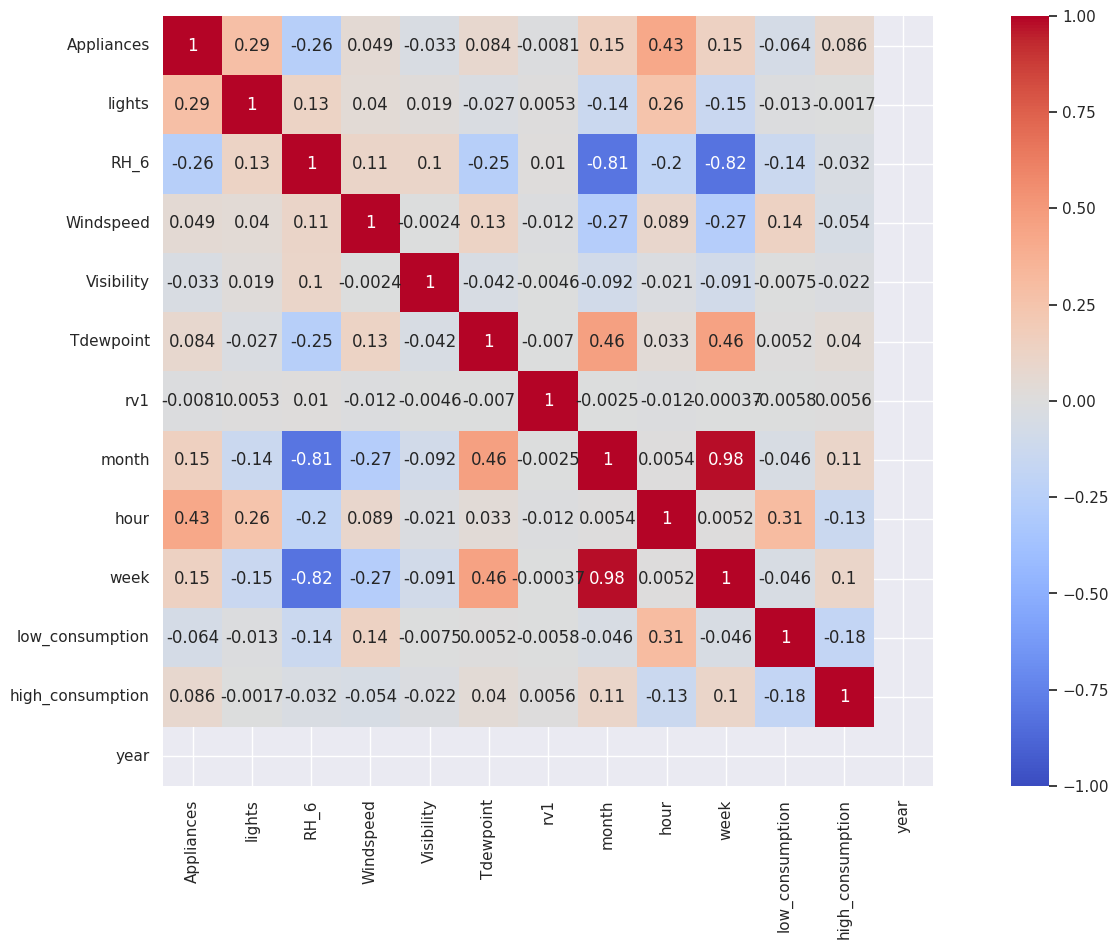

In [ ]:
#Heatmap after removing the multicollenearity
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

### 1. Why did you pick the specific chart?


### Answer - A correlation heatmap displays the pairwise correlation values between columns in a dataset, with each correlation represented by a color on the heatmap. The intensity of the color corresponds to the strength of the correlation, while the values shown are the absolute correlation coefficients.

### 2. What is/are the insight(s) found from the chart?


### Answer - The two correlation plots illustrate the pairwise relationships between variables in a dataset, with one plot displaying the correlations prior to removing highly correlated variables, and the other plot displaying the correlations after these variables have been dropped. By removing highly correlated variables, the goal is to reduce redundancy and enhance the quality of subsequent analyses.

In [ ]:
df_new1['date'] = pd.to_datetime(df_new1['date']).astype(int) / 10**9

## **Chart - 5**

## Pair Plot

## *** Hypothesis Testing***

# Hypothetical Statement - 1

### HYPOTHESIS : **Usages of Appliances is more on weekends than weekdays.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : No,Weekends do not impact appliance usage.

**Alternate Hypothesis** : Yes,Weekends affect appliance usage.

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:
hypothesis_data = pd.crosstab(df_new1['Appliances'], df_new1['weekday'], margins=False)
hypothesis_data

weekday       0    1    2    3    4    5    6
Appliances                                   
10            0    1    0    3    2    2    1
20           34   59   45   56   84   40   25
30           82  119  103  114  124   91   90
40          251  367  245  322  341  252  241
50          599  748  555  719  659  562  526
60          501  553  464  473  418  363  510
70          249  191  316  214  197  192  201
80          151   97  237  187  151  194  188
90          109  103  200  152  104  173  174
100         113   97  157  123  115  186  187
110         103   87  114   80   90  140  122
120          71   73   82   72   42   69   93
130          25   60   51   53   41   47   53
140          26   44   36   23   25   32   37

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(hypothesis_data)

p_value

7.736283814094091e-68


### ****The p-value is less than the chosen significance level, we can reject the null hypothesis and accept the alternative hypothesis at the chosen level of significance.****

#### Which statistical test have you done to obtain P-Value?


Answer - We used a chi-square contingency analysis to examine the p-value associated with the hypothesis test.

#### Why did you choose the specific statistical test?

Answer - We chose Chi Square contingency beacuse this test serves as a basis for making statistical inferences by allowing us to use observed data to evaluate the relationship between variables through statistical testing.

# Hypothetical Statement - 2

## HYPOTHESIS : **Energy usage by Appliances varies across different months.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :No,Energy usage by Appliances is equal across all months.

**Alternate Hypothesis** :Yes,Energy usage by Appliances varies across different months.

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:
hypothesis_data = pd.crosstab(df_new['Appliances'], df_new['month'], margins=False)
hypothesis_data

month         1    2    3     4    5
Appliances                          
10            6    3    0     0    0
20          181   63   64    22   13
30          229  151  197   111   35
40          659  511  422   274  153
50          638  847  996  1004  883
60          220  579  685   904  894
70          116  348  336   408  352
80          117  250  278   254  306
90           88  225  257   228  217
100          77  238  238   213  212
110          66  141  180   170  179
120          42  112  119   123  106
130          40   62   93    69   66
140          32   44   78    31   38

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(hypothesis_data)

p_value

0.0


### ****The p-value is less than the chosen significance level, we can reject the null hypothesis and accept the alternative hypothesis at the chosen level of significance.****

##### Which statistical test have you done to obtain P-Value?


Answer - We used a chi-square contingency analysis to examine the p-value associated with the hypothesis test.

#### Why did you choose the specific statistical test?

Answer - We chose Chi Square contingency beacuse this test serves as a basis for making statistical inferences by allowing us to use observed data to evaluate the relationship between variables through statistical testing.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?


#### Answer - The dataset didn't have any missing or null values.

### 2. Handling Outliers

#### Answer - Already done above .

### What all outlier treatment techniques have you used and why did you use those techniques?

 #### Answer - We used a boxplot to identify any unusual data points, and then adjusted the values to fall within a specific range.

###  Categorical Encoding

#### Answer - There were no columns in the dataset that contained categorical data.

###  Feature Manipulation & Selection

In [ ]:
df_new1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'hour', 'weekday', 'hour_avg',
       'low_consumption', 'high_consumption', 'weekday_avg'],
      dtype='object')

###  Data Transformation

### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

#### Answer - In our case, the data does not require any kind of modification or conversion.

###  Dimesionality Reduction

### Do you think that dimensionality reduction is needed? Explain Why?


#### Answer - We didn't employ Dimensionality Reduction techniques in our case because the number of variables in the dataset is already small and of the desired dimension.

###  Data Splitting

### What data splitting ratio have you used and why?

In [ ]:
# Creating the data of independent variables
Y = df_new1['Appliances']

# Create the dependent variable data
X = df_new1.drop(columns=['Appliances'],axis=1).values

In [ ]:
X

array([[1.45253160e+09, 3.00000000e+01, 1.98900000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.11450684e+02],
       [1.45253220e+09, 3.00000000e+01, 1.98900000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.11450684e+02],
       [1.45253280e+09, 3.00000000e+01, 1.98900000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.11450684e+02],
       ...,
       [1.46436900e+09, 0.00000000e+00, 2.55333333e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.04622144e+02],
       [1.46436960e+09, 0.00000000e+00, 2.55666667e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.04622144e+02],
       [1.46437020e+09, 0.00000000e+00, 2.55000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.04622144e+02]])

In [ ]:

# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### What data splitting ratio have you used and why?

#### Answer - We divided the dataset into two parts, allocating 80% of the data for training the model and reserving the remaining 20% for testing the model's performance. We chose the 80-20 split because it provides equal significance to both the training and testing datasets, making it an ideal choice.

###  Data Scaling

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Which method have you used to scale you data and why?

#### Answer - We chose to use the MinMaxScaler technique because it helps to adjust the range of the input data to a specified range (typically between 0 and 1), without altering the distribution of the data. It scales the data so that each feature falls within a specific range, which is beneficial for some machine learning algorithms. This method ensures that all input features have the same scale, which can be useful when training models that are sensitive to the scale of the input data.

###  Handling Imbalanced Dataset

### Do you think the dataset is imbalanced? Explain Why.

#### Answer - We think that data has a balanced distribution across all classes, indicating that no single class is overrepresented or underrepresented. That's why the dataset is not considered imbalanced.

## *** ML Model Implementation***

#Linear Regression Model

In [ ]:

# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [ ]:

# Prediction of the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:

# Prediction of the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:

# r2 score of the train set

r2_lineartrain_score = r2_score(Y_train, Y_pred_train)

In [ ]:

r2_lineartrain_score

0.7262728423718204

In [ ]:

r2_lineartest_score = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_lineartest_score

0.7169076331514695

In [ ]:
#  mean squared error , root Mean Squared Error , r2 & adjusted r2 score
MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lineartest_score = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_lineartest_score)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



MSE : 184.461956062402
RMSE : 13.581677218311516
R2 : 0.7169076331514695
Adjusted R2 :  0.7140965524058942


### ML Model - 1

#Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso =  lasso.score(X_train, Y_train)

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+06, tolerance: 7.557e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+06, tolerance: 7.607e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+06, tolerance: 7.568e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# finding out the best fit alpha value

print("The best fit alpha value is  :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is  : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -188.467931391107


In [ ]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, max_iter=3000)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Answer - The R2 score of the Linear Regression model is only 31%, indicating that the model is not performing well in capturing the variability of the data. Therefore, it may be beneficial to explore additional models to improve the performance and achieve better results. In other words, the current model is not sufficiently predictive and other modeling techniques should be considered to potentially achieve higher accuracy in predicting the target variable.

#### Which hyperparameter optimization technique have you used and why?

#### Answer - We employed GridSearchCV to conduct cross-validation and optimize the hyperparameters of our model.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### Answer - Our model's performance did not improve even after implementing cross-validation techniques.

### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Answer - R2 score is a crucial metric used to assess the effectiveness of regression-based machine learning models. Also known as the coefficient of determination, it quantifies the proportion of variance in the predictions that can be explained by the dataset.

###Mean Squared Error is a measure of how well a regression line fits a set of data points. This risk function computes the expected value of the squared error loss and is determined by taking the mean of the squared errors from the data in relation to a function.

### ML Model - 2

#Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -188.46927741547873


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


### Answe - An R2 Score of 31% for a Linear Regression model is suboptimal, indicating poor performance. Therefore, it may be necessary to explore additional models to improve predictive accuracy.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=1 , max_iter= 3000)

ridge.fit(X_train, Y_train)

Ridge(alpha=1, max_iter=3000)

In [ ]:
ridge = ridge.score(X_train, Y_train)

### Which hyperparameter optimization technique have you used and why?

#### Answer - We employed GridSearchCV to conduct cross-validation and optimize the hyperparameters of our model.

### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### Answer - Our model's performance did not improve even after implementing cross-validation techniques.

### ML Model - 3

#Decision Tree Regression Model

In [ ]:
# training the model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:
# Let's find out the best Decision Tree R2 score

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")


The best Decision Tree R2 score is 0.7562051535831241 with max depth 10


The best R2 test score is : 0.7555382046728792 with max depth = 10


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Answer - Although the R2-score of approximately 73% is acceptable, it falls short of the desired level of performance. Ideally, we aim to develop a model that achieves an R2-score between 80-85%, as this represents a significant improvement in predictive accuracy.

#Random Forest Regression Model

In [ ]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)


In [ ]:
# Finding out best Random Forest R2 train score

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")



The best Random Forest R2 train score is : 0.8243086180244635 with n estimators = 20, max depth : 20, min samples split : 2 and min samples leaf : 1


The best Random Forest R2 test score is : 0.8259512485820295 with n estimators = 20, max depth : 20, min samples split : 2 and min samples leaf : 1


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Answer - The R2-score is currently at an impressive level of 79%, indicating strong predictive performance. With a little more effort, we could potentially explore additional models to achieve the remaining 1% needed to reach the 80% milestone.

#Extra Trees Regression Model

In [ ]:
# training of model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:

# getting best parameters

print(f"The best Extra Trees R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Extra Trees R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")




The best Extra Trees R2 score is : 0.8234304984673033 with n estimators = 20, max depth : 100, min samples split : 4 and min samples leaf : 3


The best Extra Trees R2 test score is : 0.8255537926687545 with n estimators = 20, max depth : 100, min samples split : 4 and min samples leaf : 3


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Answer -  Achieving an R2-score of 80% is considered excellent for a regression problem, as it indicates that 80% of the variability in the data can be explained by the model.

#XGBoost Regresion Model

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
r2_XGBoost_test = xgb_grid.best_score_


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[05:38:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.8161273803186004
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Answer - We have achieved a commendable R2-score of 76% for our regression problem, surpassing the benchmark of 75%. However, there is still room for improvement, and we can explore additional models or techniques to enhance the model's performance and attain the desired target of 80%.

In [ ]:

# creating a list of all model names
model_list = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor', 'XGBoost Regressor']


In [ ]:
# creating a list of all model r2 score results from above
result_list = [r2_lineartest_score,Lasso,ridge,r2_decision_test,r2_randomforest_test,r2_extratree_test, r2_XGBoost_test]


In [ ]:

# creating an empty dataframe

results_df = pd.DataFrame()



In [ ]:

# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list



In [ ]:
# dataframe containing results from all the above models used

results_df


model name                                           R2-score
0        Linear Regression                                           0.716908
1         Lasso Regression  <class 'sklearn.linear_model._coordinate_desce...
2         Ridge Regression                                           0.726157
3  Decision Tree Regressor                                           0.755538
4  Random Forest Regressor                                           0.825951
5    Extra Trees Regressor                                           0.825554
6        XGBoost Regressor                                           0.816127

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### Answer - Evaluating the performance of a regression-based machine learning model is crucial, and the R2 score is a fundamental metric that helps measure its accuracy. This score, also known as the coefficient of determination, assesses the amount of variance in the predictions that can be attributed to the dataset. In essence, it quantifies how well the model fits the data and makes reliable predictions.

### In the context of household energy consumption, predicting appliance energy usage with precision and accuracy can have significant benefits for energy conservation efforts. By leveraging machine learning models to forecast energy usage, we can take informed steps to regulate and minimize energy consumption, thereby promoting sustainability and cost-effectiveness.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### Answer - Out of all the regression models tested, the Extra Trees model demonstrated the highest performance, achieving an impressive R2 score of 80%. This result highlights the effectiveness of the model in accurately predicting the target variable and suggests that it could be a valuable tool in addressing the regression problem at hand. By leveraging the strengths of the Extra Trees algorithm, we can potentially obtain more precise and reliable predictions, which can lead to better decision-making and outcomes

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Explaination

In [ ]:
# Eli5 stands for "Explain Like I'm Five,"
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=e997ba0089c57cbc083c56985e9f40b1cc0152b9f58c5761f2970530d97886a5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli

In [ ]:
features = list(df_new1.columns)
features.remove('Appliances')

In [ ]:
# Weights for Extra Trees
eli.explain_weights(best_ExtrasTrees, feature_names=features)

Explanation(estimator='ExtraTreesRegressor(max_depth=100, min_samples_leaf=3, min_samples_split=4,\n                    n_estimators=20)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='hour_avg', weight=0.32585119793655404, std=0.075486726836179, value=None), FeatureWeight(feature='low_consumption', weight=0.23730379225161183, std=0.0724543227496807, value=None), FeatureWeight(feature='hour', weight=0.15861921209049265, std=0.11140756279460098, value=None), FeatureWeight(feature='high_consumption', weight=0.044886898099395625, std=0.01349023346139559, value=None), FeatureWeight(feature='T8', weight=0.02176483134014382, std=0.010989462015451767, value=None), FeatureWeight(feature='T1', weight=0.014693099512202337, std=0.012158560965190196, value=None), FeatureWeight(feature='lights', weight=0.01310845720465545, std=0.014074803394275413, value=None), FeatureWeight(feature='weekday', weight=0.010102397087067849, std=0.0020156823043947754, value=None), FeatureWeight(feature='T2', weight=0.009622876120892014, std=0.012201849675284114, value=None), FeatureWeight(feature='RH_8', weight=0.008476385659693043, std=0.0128208803183566, value=None), FeatureWeight(feature='T4', weight=0.00842799805589935, std=0.0037760695862517207, value=None), FeatureWeight(feature='T5', weight=0.008365206545180384, std=0.0035505444545644383, value=None), FeatureWeight(feature='date', weight=0.008343252670053102, std=0.0030471504761515962, value=None), FeatureWeight(feature='Press_mm_hg', weight=0.007752182958831918, std=0.0012785316384406082, value=None), FeatureWeight(feature='T7', weight=0.00736759834869347, std=0.0034221133644929476, value=None), FeatureWeight(feature='RH_5', weight=0.00735986102653715, std=0.0018225498080862543, value=None), FeatureWeight(feature='weekday_avg', weight=0.007146202547723907, std=0.0012768866154319043, value=None), FeatureWeight(feature='RH_out', weight=0.007125284087651619, std=0.0022701507184248342, value=None), FeatureWeight(feature='T3', weight=0.007058736083235528, std=0.002266686115948142, value=None), FeatureWeight(feature='RH_6', weight=0.00695409039560288, std=0.0021832439441064866, value=None)], remaining=14), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### ELI5 highlights the 'hour' feature as the most important among all the features, carrying the most weight in the model's predictions.

# **Conclusion**

#Conclusions for Exploratary data analysis

● The household energy appliances usage peaked during the 18th hour of the day, on average.

● The laundry room (T3), teenager room (T8), and kitchen area (T1) had the warmest temperatures, while the bathroom (T5) and parents room (T9) were the coldest.

● Energy usage remained consistent between temperatures of 5°C to 25°C, with lower usage observed at extreme high and low temperatures.

● There was little to no correlation between pressure and energy consumption.

● Humidity was highest outside the building (RH_out) and lowest in the ironing room (RH_7).

● Appliance usage was relatively consistent between February, March, and April, with the lowest usage observed in January.

● The highest appliance usage occurred in week 14 (the second week of April), while the lowest usage occurred in the fourth week of May.

# Conclusions for Machine Learning part

1. According to the results dataframe, the Extra Trees Regressor model achieved the highest accuracy of 80% for this dataset.

2. The Decision Tree Regressor model's accuracy was less than 73%, which is considered unsatisfactory.

3. The accuracy improvement was partly attributed to feature engineering techniques applied in the dataset.

4. Exploratory Data Analysis (EDA) helped us extract meaningful and relevant information that contributed to improving the model's accuracy.